### Instructions to access

jupyter notebook --no-browser --port 1234
ssh -NL 1234:localhost:1234 team4@telemachus.ucd.ie

In [6]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [7]:
# load times buses left from each stop
leavetimes = pd.read_csv("tmp/data/rt_leavetimes_DB_2018.txt",sep=";",parse_dates=[1])

In [8]:
leavetimes.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-01-01,5972116.0,12.0,119.0,48030.0,48030.0,48012.0,48012.0,2693211.0,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
1,DB,2018-01-01,5966674.0,12.0,119.0,54001.0,54001.0,54023.0,54023.0,2693267.0,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
2,DB,2018-01-01,5959105.0,12.0,119.0,60001.0,60001.0,59955.0,59955.0,2693263.0,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
3,DB,2018-01-01,5966888.0,12.0,119.0,58801.0,58801.0,58771.0,58771.0,2693284.0,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
4,DB,2018-01-01,5965960.0,12.0,119.0,56401.0,56401.0,56309.0,56323.0,2693209.0,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN


In [9]:
leavetimes.shape

(9183500, 18)

In [10]:
# inspect leavetime data
pd.DataFrame(leavetimes.nunique())

,0
DATASOURCE,1
DAYOFSERVICE,31
TRIPID,76418
PROGRNUMBER,103
STOPPOINTID,4714
PLANNEDTIME_ARR,68803
PLANNEDTIME_DEP,68803
ACTUALTIME_ARR,71774
ACTUALTIME_DEP,71764
VEHICLEID,996


In [11]:
leavetimes["DAYOFSERVICE"].describe(datetime_is_numeric=True)

count                          9183500
mean     2018-01-15 14:00:13.588549376
min                2018-01-01 00:00:00
25%                2018-01-08 00:00:00
50%                2018-01-16 00:00:00
75%                2018-01-23 00:00:00
max                2018-01-31 00:00:00
Name: DAYOFSERVICE, dtype: object

In [12]:
# check for trip id with nan values
leavetimes = leavetimes.loc[leavetimes["TRIPID"].notna()]

In [13]:
# convert tripid to an integer number
leavetimes.astype({'TRIPID': 'int32'})

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-01-01,5972116,12.0,119.0,48030.0,48030.0,48012.0,48012.0,2693211.0,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
1,DB,2018-01-01,5966674,12.0,119.0,54001.0,54001.0,54023.0,54023.0,2693267.0,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
2,DB,2018-01-01,5959105,12.0,119.0,60001.0,60001.0,59955.0,59955.0,2693263.0,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
3,DB,2018-01-01,5966888,12.0,119.0,58801.0,58801.0,58771.0,58771.0,2693284.0,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
4,DB,2018-01-01,5965960,12.0,119.0,56401.0,56401.0,56309.0,56323.0,2693209.0,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9183494,DB,2018-01-31,6231934,48.0,619.0,67141.0,67141.0,67022.0,67033.0,2693190.0,NaN,NaN,NaN,NaN,NaN,NaN,08-FEB-18 14:17:10,NaN
9183495,DB,2018-01-31,6229694,48.0,619.0,58441.0,58441.0,58253.0,58261.0,1001156.0,NaN,NaN,NaN,NaN,NaN,NaN,08-FEB-18 14:17:10,NaN
9183496,DB,2018-01-31,6236120,48.0,619.0,40638.0,40638.0,40152.0,40152.0,1000760.0,NaN,NaN,NaN,NaN,NaN,NaN,08-FEB-18 14:17:10,NaN
9183497,DB,2018-01-31,6235612,48.0,619.0,39138.0,39138.0,39061.0,39070.0,1000886.0,NaN,NaN,NaN,NaN,NaN,NaN,08-FEB-18 14:17:10,NaN


In [14]:
leavetimes.dtypes

DATASOURCE                 object
DAYOFSERVICE       datetime64[ns]
TRIPID                    float64
PROGRNUMBER               float64
STOPPOINTID               float64
PLANNEDTIME_ARR           float64
PLANNEDTIME_DEP           float64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
VEHICLEID                 float64
PASSENGERS                float64
PASSENGERSIN              float64
PASSENGERSOUT             float64
DISTANCE                  float64
SUPPRESSED                float64
JUSTIFICATIONID           float64
LASTUPDATE                 object
NOTE                      float64
dtype: object

In [15]:
# import weather data
weather = pd.read_csv("./tmp/data/weather.csv")

In [16]:
weather.head()

,dt_iso,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,...,wind_speed,wind_deg,wind_gust,rain_1h,clouds_all,weather_id,weather_main,weather_description,weather_icon,Hour
0,01-JAN-17,53.345035,-6.267261,5.39,9999.0,4.35,1.78,5.36,6.56,1019,...,5.1,330,0.0,2.30,75,501,Rain,moderate rain,10n,0
1,01-JAN-17,53.345035,-6.267261,5.39,9999.0,4.35,2.28,5.36,5.56,1019,...,4.1,310,0.0,1.51,75,501,Rain,moderate rain,10n,1
2,01-JAN-17,53.345035,-6.267261,5.39,9999.0,4.35,2.28,5.36,5.56,1019,...,4.1,320,0.0,0.64,75,500,Rain,light rain,10n,2
3,01-JAN-17,53.345035,-6.267261,4.39,9999.0,3.36,0.04,4.36,5.56,1019,...,6.2,330,0.0,0.17,75,500,Rain,light rain,10n,3
4,01-JAN-17,53.345035,-6.267261,4.39,9999.0,2.42,0.04,4.36,4.56,1019,...,6.2,330,0.0,0.00,75,803,Clouds,broken clouds,04n,4


In [17]:
weather = weather[["dt_iso","Hour","weather_icon"]]

In [18]:
weather.loc[:,"dt_iso"] = pd.to_datetime(weather["dt_iso"])
weather.head()

,dt_iso,Hour,weather_icon
0,2017-01-01,0,10n
1,2017-01-01,1,10n
2,2017-01-01,2,10n
3,2017-01-01,3,10n
4,2017-01-01,4,04n


In [19]:
weather.loc[:,"weather_icon"] = weather["weather_icon"].str[:-1]

In [20]:
weather.head()

,dt_iso,Hour,weather_icon
0,2017-01-01,0,10
1,2017-01-01,1,10
2,2017-01-01,2,10
3,2017-01-01,3,10
4,2017-01-01,4,04


In [21]:
weather = weather.rename(columns={"dt_iso": "DAYOFSERVICE","Hour":"HOUROFDAY"})

In [22]:
weather["HOUROFDAY"] = np.where(weather["HOUROFDAY"]==0, 24, weather["HOUROFDAY"])

In [23]:
weather.dtypes

DAYOFSERVICE    datetime64[ns]
HOUROFDAY                int64
weather_icon            object
dtype: object

In [24]:
weather["HOUROFDAY"].unique()

array([24,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [25]:
weather.head()

,DAYOFSERVICE,HOUROFDAY,weather_icon
0,2017-01-01,24,10
1,2017-01-01,1,10
2,2017-01-01,2,10
3,2017-01-01,3,10
4,2017-01-01,4,04


In [26]:
# load data relating to the total trip time for each route
trips = pd.read_csv("tmp/data/rt_trips_DB_2018.txt",sep=";",parse_dates=[1])

In [27]:
trips.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,"
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,"


In [28]:
trips.dtypes

DATASOURCE                 object
DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
LINEID                     object
ROUTEID                    object
DIRECTION                   int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
BASIN                      object
TENDERLOT                 float64
SUPPRESSED                float64
JUSTIFICATIONID           float64
LASTUPDATE                 object
NOTE                       object
dtype: object

In [29]:
trips["DAYOFSERVICE"].describe(datetime_is_numeric=True)

count                          2182637
mean     2018-06-28 17:25:38.969786880
min                2018-01-01 00:00:00
25%                2018-03-31 00:00:00
50%                2018-06-28 00:00:00
75%                2018-09-26 00:00:00
max                2018-12-31 00:00:00
Name: DAYOFSERVICE, dtype: object

In [30]:
pd.DataFrame(trips.nunique())

,0
DATASOURCE,1
DAYOFSERVICE,360
TRIPID,658964
LINEID,130
ROUTEID,588
DIRECTION,2
PLANNEDTIME_ARR,64461
PLANNEDTIME_DEP,791
ACTUALTIME_ARR,68122
ACTUALTIME_DEP,66771


From the above it is clear that a number of columns in the dataframe add no value as their unique count is either zero or one. <br>
The affected columns are DATASOURCE,BASIN,TENDERLOT and can all be removed. <br>
In addition JUSTIFICATIONID, LASTUPDATE,NOTE appear to add little information of value and can be dropped also

In [31]:
# drop columns that have a 0 or 1 entries as this provides no additional information
trips.drop(columns=["DATASOURCE","BASIN","TENDERLOT","SUPPRESSED"],inplace=True)

In [32]:
# in addition JustificationID, Last Update and Notes would appear to add little valuable information so they will be ignored
trips.drop(columns=["JUSTIFICATIONID","LASTUPDATE","NOTE"],inplace=True)

In [33]:
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0


It would make sense that the components of a date have an effect on trip time namely, day of the week and month of the year and so these will be added as features derived from the DAYOFSERVICE column in the data

In [34]:
# get day of the week which it is running
trips["WEEKDAY"]=trips["DAYOFSERVICE"].dt.day_name()

In [35]:
# view data after adding weekday
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,WEEKDAY
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,Wednesday
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,Wednesday
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,Wednesday
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,Wednesday
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,Wednesday


In [36]:
# remove any instance where the illogical event of departure time from first station after arrival time at end station
trips = trips.loc[trips["ACTUALTIME_DEP"]<trips["ACTUALTIME_ARR"]]

In [37]:
trips.shape

(1893264, 10)

In [38]:
# convert times to hours
trips["ACTUALTIME_ARR"]=trips["ACTUALTIME_ARR"]/60**2
trips["ACTUALTIME_DEP"]=trips["ACTUALTIME_DEP"]/60**2
trips["PLANNEDTIME_ARR"]=trips["PLANNEDTIME_ARR"]/60**2
trips["PLANNEDTIME_DEP"]=trips["PLANNEDTIME_DEP"]/60**2

In [39]:
# get total travel time of trip and convert to minutes from hours
trips["TRIPTIME"] = (trips["ACTUALTIME_ARR"]-trips["ACTUALTIME_DEP"])*60

In [40]:
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,WEEKDAY,TRIPTIME
0,2018-02-07,6253783,68,68_80,1,24.234722,23.500000,24.312222,23.500000,Wednesday,48.733333
2,2018-02-07,6254942,45A,45A_70,2,9.864444,8.916667,10.091389,8.911667,Wednesday,70.783333
3,2018-02-07,6259460,25A,25A_273,1,15.905833,15.116667,16.239722,15.123056,Wednesday,67.000000
4,2018-02-07,6253175,14,14_15,1,23.717500,22.666667,23.522778,22.668889,Wednesday,51.233333
5,2018-02-07,6248240,77A,77A_28,2,11.568889,10.333333,11.671944,10.427222,Wednesday,74.683333


In [41]:
# trips taking under 10 minutes would appear to be too short for the data to be correct
# trips = trips.loc[trips["TRIPTIME"]>10]

In [42]:
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,WEEKDAY,TRIPTIME
0,2018-02-07,6253783,68,68_80,1,24.234722,23.500000,24.312222,23.500000,Wednesday,48.733333
2,2018-02-07,6254942,45A,45A_70,2,9.864444,8.916667,10.091389,8.911667,Wednesday,70.783333
3,2018-02-07,6259460,25A,25A_273,1,15.905833,15.116667,16.239722,15.123056,Wednesday,67.000000
4,2018-02-07,6253175,14,14_15,1,23.717500,22.666667,23.522778,22.668889,Wednesday,51.233333
5,2018-02-07,6248240,77A,77A_28,2,11.568889,10.333333,11.671944,10.427222,Wednesday,74.683333


In [43]:
# get the hour of the day on which the service is operating
trips["HOUROFDAY"] = (round(trips["PLANNEDTIME_DEP"])).astype(int)

In [44]:
# get the month of the year on which the service is operating
trips["MONTHOFYEAR"] = trips["DAYOFSERVICE"].dt.month_name()

In [45]:
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,WEEKDAY,TRIPTIME,HOUROFDAY,MONTHOFYEAR
0,2018-02-07,6253783,68,68_80,1,24.234722,23.500000,24.312222,23.500000,Wednesday,48.733333,24,February
2,2018-02-07,6254942,45A,45A_70,2,9.864444,8.916667,10.091389,8.911667,Wednesday,70.783333,9,February
3,2018-02-07,6259460,25A,25A_273,1,15.905833,15.116667,16.239722,15.123056,Wednesday,67.000000,15,February
4,2018-02-07,6253175,14,14_15,1,23.717500,22.666667,23.522778,22.668889,Wednesday,51.233333,23,February
5,2018-02-07,6248240,77A,77A_28,2,11.568889,10.333333,11.671944,10.427222,Wednesday,74.683333,10,February


In [46]:
weather.head()

,DAYOFSERVICE,HOUROFDAY,weather_icon
0,2017-01-01,24,10
1,2017-01-01,1,10
2,2017-01-01,2,10
3,2017-01-01,3,10
4,2017-01-01,4,04


In [47]:
trips = trips.merge(weather, on=["DAYOFSERVICE","HOUROFDAY"], how='left')

In [48]:
trips.loc[trips["weather_icon"].isna()]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,WEEKDAY,TRIPTIME,HOUROFDAY,MONTHOFYEAR,weather_icon


In [49]:
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,WEEKDAY,TRIPTIME,HOUROFDAY,MONTHOFYEAR,weather_icon
0,2018-02-07,6253783,68,68_80,1,24.234722,23.500000,24.312222,23.500000,Wednesday,48.733333,24,February,02
1,2018-02-07,6254942,45A,45A_70,2,9.864444,8.916667,10.091389,8.911667,Wednesday,70.783333,9,February,04
2,2018-02-07,6259460,25A,25A_273,1,15.905833,15.116667,16.239722,15.123056,Wednesday,67.000000,15,February,09
3,2018-02-07,6259460,25A,25A_273,1,15.905833,15.116667,16.239722,15.123056,Wednesday,67.000000,15,February,10
4,2018-02-07,6253175,14,14_15,1,23.717500,22.666667,23.522778,22.668889,Wednesday,51.233333,23,February,09


In [50]:
weather.head()

,DAYOFSERVICE,HOUROFDAY,weather_icon
0,2017-01-01,24,10
1,2017-01-01,1,10
2,2017-01-01,2,10
3,2017-01-01,3,10
4,2017-01-01,4,04


In [51]:
weather["HOUROFDAY"].unique()

array([24,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [52]:
trips["weather_icon"].unique()

array(['02', '04', '09', '10', '03', '50', '01', '13', '11'], dtype=object)

In [53]:
trips["HOUROFDAY"].unique()

array([24,  9, 15, 23, 10,  8, 11, 14, 12, 16, 17, 20, 13,  7, 18,  6, 21,
       19, 22,  5,  4])

In [54]:
# add bank holidays to dataframe
d = {'bankholiday': ['2018-01-01','2018-03-17','2018-04-02','2018-05-07','2018-06-04','2018-08-06',
                 '2018-10-31','2018-12-25','2018-12-26']}
df = pd.DataFrame(data=d)
df['bankholiday'] = pd.to_datetime(df['bankholiday'])
df.dtypes


bankholiday    datetime64[ns]
dtype: object

In [55]:
trips["BANKHOLIDAY"] = np.where(trips['DAYOFSERVICE'].isin(df['bankholiday']), True, False)

In [56]:
route_list = list(trips["LINEID"].unique()) # get unique list of bus routes
route_list = [e for e in route_list if e not in ('51X', '46E',"68A","118","51D","27X",
                                                 "32X","14C","16C","42D","31D","33D",
                                                "7D","15D","41A","38D","236","161",
                                                "70D","69X","116","77X","25X","68X",
                                                "16D","33E","41D")]

routes_with_directions = []
for route in route_list:
    x =["1","2"] # for each route have each direction of travel specified
    for elem in x:
        routes_with_directions.append(f"{route}_{elem}")

In [59]:
%pprint
route_list = list(trips["LINEID"].unique()) # get unique list of bus routes
route_list = [e for e in route_list if e not in ('51X', '46E',"68A","118","51D","27X",
                                                 "32X","14C","16C","42D","31D","33D",
                                                "7D","15D","41A","38D","236","161",
                                                "70D","69X","116","77X","25X","68X",
                                                "16D","33E","41D")]
route_list

Pretty printing has been turned OFF


['68', '45A', '25A', '14', '77A', '39', '16', '40D', '27B', '142', '83', '130', '15', '46A', '33', '7', '39A', '1', '41', '67X', '59', '9', '40', '239', '84', '53', '185', '151', '13', '15B', '65B', '29A', '61', '140', '123', '79A', '38A', '31', '69', '44', '42', '67', '184', '238', '145', '17A', '32', '27A', '17', '122', '54A', '66', '150', '56A', '37', '27', '15A', '65', '47', '76', '79', '83A', '63', '33B', '4', '120', '41C', '70', '84A', '220', '84X', '38', '102', '270', '33X', '75', '26', '66A', '31A', '49', '111', '18', '11', '114', '76A', '44B', '7A', '43', '25', '104', '33A', '31B', '66X', '39X', '41B', '25B', '25D', '40B', '66B', '38B', '7B', '41X', '40E']

In [55]:
#create a data frame dictionary to store your data frames
DataFrameDict = {route : pd.DataFrame() for route in routes_with_directions}

for key in DataFrameDict.keys():
    DataFrameDict[key] = trips.loc[(trips["LINEID"] == key[:-2]) & (trips["DIRECTION"]==int(key[-1]))]  

In [56]:
for route in routes_with_directions:
    if len(DataFrameDict[route])<500:
        print(f"{route} has too few entries: {len(DataFrameDict[route])}")

In [55]:
route="1_1"

<AxesSubplot:title={'center':'1_1 travel times'}, xlabel='Time', ylabel='Count'>

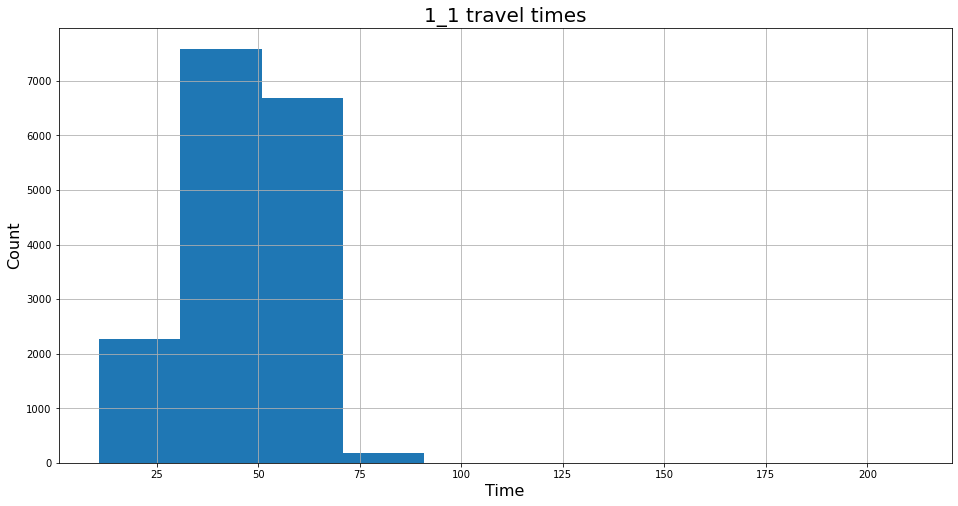

In [56]:
from matplotlib import pyplot as plt# plot of datetime

# for route in routes_with_directions:
fig, ax = plt.subplots(figsize=(16,8))
plt.title(f"{route} travel times",fontsize=20)
plt.xlabel('Time',fontsize=16)
plt.ylabel('Count',fontsize=16) 
DataFrameDict[route]['TRIPTIME'].hist()

In [57]:
# route level descriptive statistics of price data
route_statistics = pd.DataFrame(DataFrameDict[route]["TRIPTIME"].describe())

In [58]:
route_statistics

,TRIPTIME
count,16730.000000
mean,46.430172
std,12.529229
min,10.800000
25%,40.033333
50%,48.500000
75%,54.616667
max,210.733333


Since, as expected, the majority of routes closely follow a normal distribution, descriptive statistics will be used to calculate Z scores so that extreme outliers can removed from the dataset (i.e. those greater than 3 standard deviations from the mean)

In [59]:
DataFrameDict[route]["Z_SCORE"]= (DataFrameDict[route]["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]

/tmp/ipykernel_19400/2449548750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrameDict[route]["Z_SCORE"]= (DataFrameDict[route]["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


In [60]:
DataFrameDict[route].head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,WEEKDAY,TRIPTIME,HOUROFDAY,MONTHOFYEAR,weather_icon,BANKHOLIDAY,Z_SCORE
394,2018-09-28,7773565,1,1_37,1,18.504722,17.666667,18.821389,17.700833,Friday,67.233333,18,September,03,False,1.660370
395,2018-09-28,7769275,1,1_37,1,17.838056,17.000000,17.974444,16.998333,Friday,58.566667,17,September,02,False,0.968655
1378,2018-03-11,6387812,1,1_37,1,19.213056,18.500000,19.395833,18.606944,Sunday,47.333333,18,March,50,False,0.072084
2058,2018-10-10,8028396,1,1_37,1,10.247778,9.333333,10.286389,9.328056,Wednesday,57.500000,9,October,02,False,0.883520
2059,2018-10-10,8025474,1,1_37,1,10.581111,9.666667,10.591667,9.705278,Wednesday,53.183333,10,October,02,False,0.538993


In [61]:
DataFrameDict[route].shape

(16730, 16)

In [62]:
# remove entries which are more than 3 standard deviations from the mean
DataFrameDict[route]=DataFrameDict[route].loc[abs(DataFrameDict[route]["Z_SCORE"])<3]

## Get model data

In [63]:
# use value corresponding to key in dictionary as the model in questioin
model_data = DataFrameDict[route]

In [64]:
model_data.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,WEEKDAY,TRIPTIME,HOUROFDAY,MONTHOFYEAR,weather_icon,BANKHOLIDAY,Z_SCORE
394,2018-09-28,7773565,1,1_37,1,18.504722,17.666667,18.821389,17.700833,Friday,67.233333,18,September,03,False,1.660370
395,2018-09-28,7769275,1,1_37,1,17.838056,17.000000,17.974444,16.998333,Friday,58.566667,17,September,02,False,0.968655
1378,2018-03-11,6387812,1,1_37,1,19.213056,18.500000,19.395833,18.606944,Sunday,47.333333,18,March,50,False,0.072084
2058,2018-10-10,8028396,1,1_37,1,10.247778,9.333333,10.286389,9.328056,Wednesday,57.500000,9,October,02,False,0.883520
2059,2018-10-10,8025474,1,1_37,1,10.581111,9.666667,10.591667,9.705278,Wednesday,53.183333,10,October,02,False,0.538993


In [65]:
model_data.shape

(16714, 16)

In [66]:
model_data.describe()

,TRIPID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,TRIPTIME,HOUROFDAY,Z_SCORE
count,1.671400e+04,16714.0,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000
mean,7.199216e+06,1.0,15.137241,14.422729,15.205143,14.432212,46.375811,14.433170,-0.004339
std,7.537179e+05,0.0,4.834587,4.819799,4.832148,4.820422,12.377244,4.845596,0.987870
min,5.956085e+06,1.0,6.773889,6.500000,6.731667,6.485833,10.800000,6.000000,-2.843764
25%,6.603389e+06,1.0,11.095000,10.333333,11.154653,10.325000,40.033333,10.000000,-0.510553
50%,7.148163e+06,1.0,15.094722,14.333333,15.124028,14.322361,48.500000,14.000000,0.165200
75%,8.053670e+06,1.0,19.118889,18.333333,19.151597,18.334931,54.600000,18.000000,0.652061
max,8.587371e+06,1.0,23.883333,23.500000,24.365000,24.059167,83.733333,24.000000,2.977291


In [67]:
model_data.columns

Index(['DAYOFSERVICE', 'TRIPID', 'LINEID', 'ROUTEID', 'DIRECTION',
       'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR',
       'ACTUALTIME_DEP', 'WEEKDAY', 'TRIPTIME', 'HOUROFDAY', 'MONTHOFYEAR',
       'weather_icon', 'BANKHOLIDAY', 'Z_SCORE'],
      dtype='object')

In [68]:
model_data = model_data.drop(columns=["DAYOFSERVICE","TRIPID","LINEID","ROUTEID","DIRECTION",
                         "PLANNEDTIME_ARR","PLANNEDTIME_DEP","ACTUALTIME_ARR","ACTUALTIME_DEP","Z_SCORE"])

In [69]:
model_data.head()

,WEEKDAY,TRIPTIME,HOUROFDAY,MONTHOFYEAR,weather_icon,BANKHOLIDAY
394,Friday,67.233333,18,September,03,False
395,Friday,58.566667,17,September,02,False
1378,Sunday,47.333333,18,March,50,False
2058,Wednesday,57.500000,9,October,02,False
2059,Wednesday,53.183333,10,October,02,False


In [70]:
model_data.dtypes

WEEKDAY          object
TRIPTIME        float64
HOUROFDAY         int64
MONTHOFYEAR      object
weather_icon     object
BANKHOLIDAY        bool
dtype: object

In [71]:
import seaborn as sns
# function to allow plotting of a categorical feature
def categorical_boxplots(feature):
    fig, ax = plt.subplots(figsize=(16,8))
    feature_values = model_data[feature].unique()
    testlist = []
    for entry in feature_values:
        testlist.append(model_data.loc[model_data[feature]==entry])

    ctraining_sample = pd.concat(testlist)   
    ax = sns.boxplot(x=model_data['TRIPTIME'],y=feature, hue=feature, data=ctraining_sample, dodge=False)
#     plt.xlim(0,1500000)
    plt.yticks([])
    plt.show()

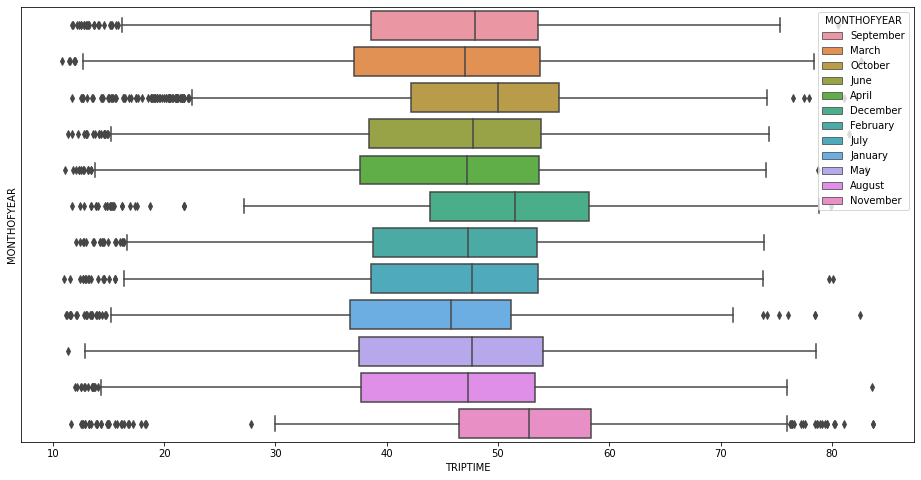

In [72]:
categorical_boxplots('MONTHOFYEAR')

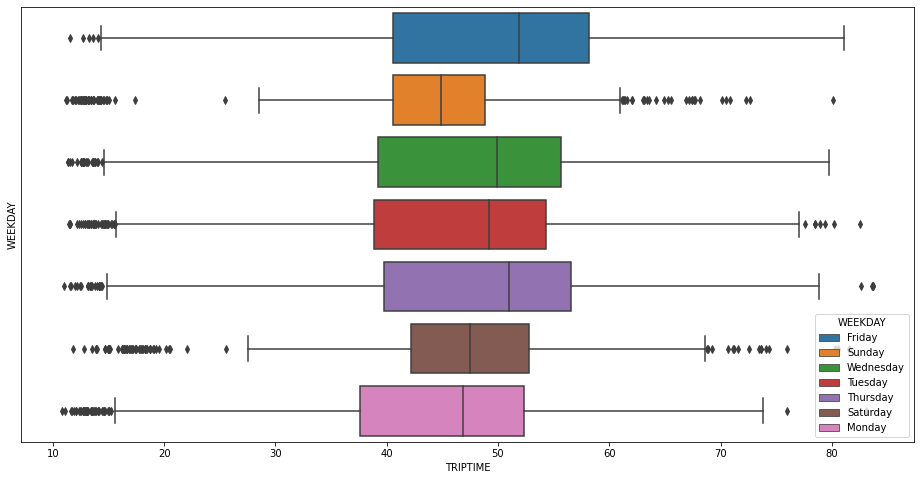

In [73]:
categorical_boxplots('WEEKDAY')

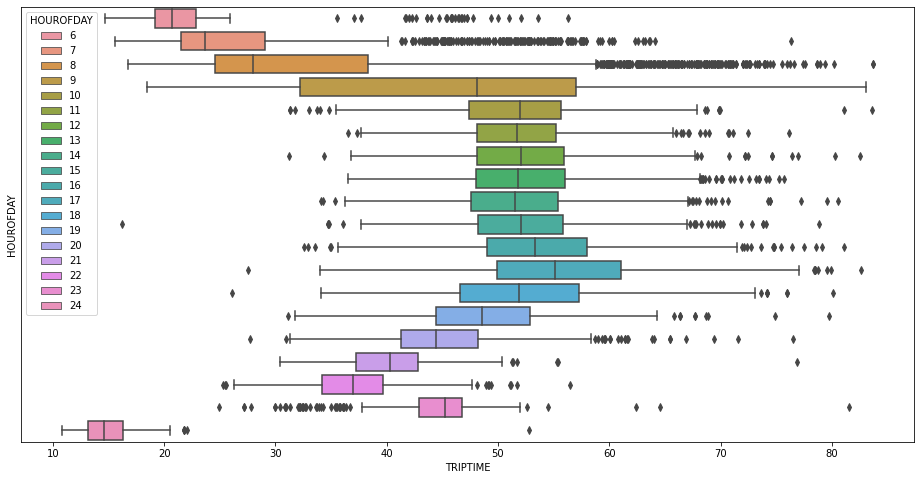

In [74]:
model_data['HOUROFDAY'] = model_data['HOUROFDAY'].astype('category')
categorical_boxplots('HOUROFDAY')

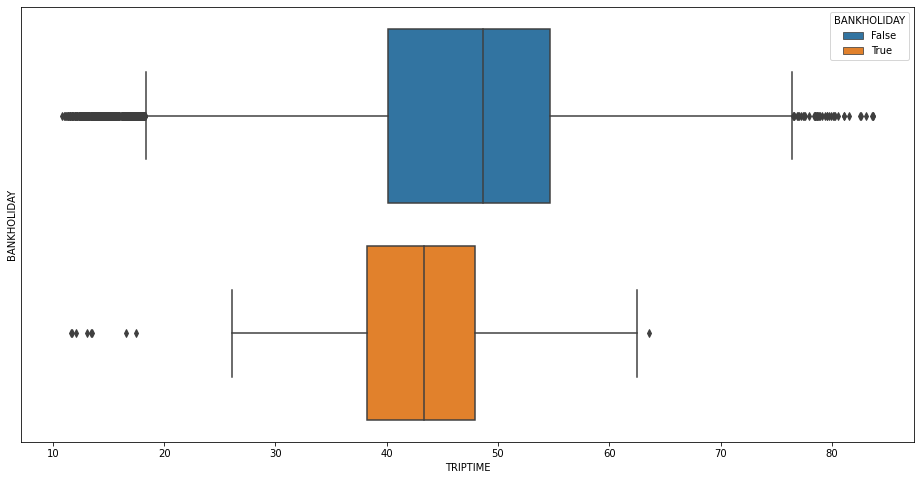

In [75]:
model_data['BANKHOLIDAY'] = model_data['BANKHOLIDAY'].astype('category')
fig, ax = plt.subplots(figsize=(16,8))
feature_values = model_data['BANKHOLIDAY'].unique()
testlist = []
for entry in feature_values:
    testlist.append(model_data.loc[model_data['BANKHOLIDAY']==entry])

ctraining_sample = pd.concat(testlist)

ax = sns.boxplot(x=model_data['TRIPTIME'],y="BANKHOLIDAY", hue="BANKHOLIDAY", data=ctraining_sample, dodge=False)
plt.yticks([])
plt.show()

In [76]:
model_data.shape

(16714, 6)

## Encode categorical feature variables
Encodings will have to be added to categorical features so that they can be interpretted by the model.

In [77]:
# get dummy encodings for all categorical variables
model_data = pd.get_dummies(model_data,columns=["WEEKDAY","HOUROFDAY","MONTHOFYEAR","BANKHOLIDAY","weather_icon"], drop_first=True)

In [78]:
model_data.head()

,TRIPTIME,WEEKDAY_Monday,WEEKDAY_Saturday,WEEKDAY_Sunday,WEEKDAY_Thursday,WEEKDAY_Tuesday,WEEKDAY_Wednesday,HOUROFDAY_7,HOUROFDAY_8,HOUROFDAY_9,...,MONTHOFYEAR_September,BANKHOLIDAY_True,weather_icon_02,weather_icon_03,weather_icon_04,weather_icon_09,weather_icon_10,weather_icon_11,weather_icon_13,weather_icon_50
394,67.233333,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
395,58.566667,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1378,47.333333,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2058,57.500000,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2059,53.183333,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [79]:
model_data.shape

(16714, 45)

<AxesSubplot:title={'center':'1_1 travel times'}, xlabel='Time', ylabel='Count'>

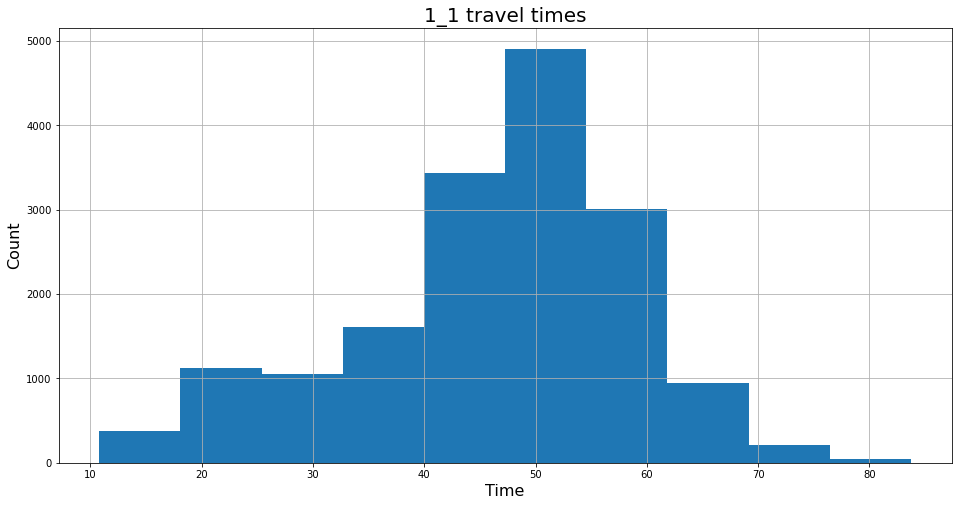

In [80]:
fig, ax = plt.subplots(figsize=(16,8))
plt.title(f"{route} travel times",fontsize=20)
plt.xlabel('Time',fontsize=16)
plt.ylabel('Count',fontsize=16) 
model_data['TRIPTIME'].hist()

# Fit Linear Model to 145 direction 2

In [81]:
# segment the data
X = model_data.drop(columns=['TRIPTIME'])
y = model_data['TRIPTIME']

# set random state to a integer value to return the same sample every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [82]:
# fit a linear regression model to the training set
linreg = LinearRegression().fit(X_train, y_train)

In [83]:
# create a dataframe of feature variables and their respective coefficients from the linear regression
linear_model = pd.DataFrame()
linear_model['Features'] = X_train.columns
linear_model['Coefficient'] = linreg.coef_
linear_model.sort_values(by=['Coefficient'],ascending=False)

,Features,Coefficient
16,HOUROFDAY_17,32.151447
15,HOUROFDAY_16,30.309909
14,HOUROFDAY_15,28.885270
12,HOUROFDAY_13,28.796248
17,HOUROFDAY_18,28.711584
11,HOUROFDAY_12,28.591055
13,HOUROFDAY_14,28.295725
10,HOUROFDAY_11,27.570853
9,HOUROFDAY_10,27.399797
18,HOUROFDAY_19,24.680433


In [84]:
## use linear regression model to predict values for the training sample
train_predictions = linreg.predict(X_train)

In [85]:
X_train.columns

Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_11', 'weather_icon_13',
       'weather_icon_50'],
      dtype='object')

In [86]:
X_train.head(1)

,WEEKDAY_Monday,WEEKDAY_Saturday,WEEKDAY_Sunday,WEEKDAY_Thursday,WEEKDAY_Tuesday,WEEKDAY_Wednesday,HOUROFDAY_7,HOUROFDAY_8,HOUROFDAY_9,HOUROFDAY_10,...,MONTHOFYEAR_September,BANKHOLIDAY_True,weather_icon_02,weather_icon_03,weather_icon_04,weather_icon_09,weather_icon_10,weather_icon_11,weather_icon_13,weather_icon_50
879792,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [87]:
performance_snapshot = pd.DataFrame()
performance_snapshot['Actual']= y_train
performance_snapshot['Predicted']= train_predictions
performance_snapshot['Difference'] = abs(performance_snapshot['Actual']-performance_snapshot['Predicted'])
performance_snapshot.reset_index(drop=True,inplace=True)
performance_snapshot.sort_values(by='Difference',ascending=False).head(10)

,Actual,Predicted,Difference
3650,83.733333,41.062709,42.670624
11276,83.733333,41.898692,41.834642
7395,76.283333,34.493339,41.789994
6341,83.066667,42.933785,40.132881
9368,81.583333,41.712335,39.870999
13161,80.150000,40.354468,39.795532
7692,79.383333,40.354468,39.028865
7887,74.200000,35.540722,38.659278
1440,78.950000,40.354468,38.595532
13111,77.550000,39.518485,38.031515


In [55]:
def model_metrics(actual_vals, predictions):
    print('\n******************************************************')
    print("MAPE: ", metrics.mean_absolute_percentage_error(actual_vals, predictions))
    print("RMSE: ", metrics.mean_squared_error(actual_vals, predictions)**0.5)
    print("R2: ", metrics.r2_score(actual_vals, predictions))
    print('\n******************************************************')

In [89]:
model_metrics(y_train, train_predictions)


******************************************************
MAPE:  0.13629992080552783
RMSE:  7.737733438937105
R2:  0.6132968338210814

******************************************************


In [90]:
## use linear regression model to predict values for the training sample
test_predictions = linreg.predict(X_test)

In [91]:
performance_snapshot = pd.DataFrame()
performance_snapshot['Actual']= y_test[:10]
performance_snapshot['Predicted']= test_predictions[:10]
performance_snapshot['Difference'] = abs(performance_snapshot['Actual']-performance_snapshot['Predicted'])
performance_snapshot.reset_index(drop=True,inplace=True)
performance_snapshot

,Actual,Predicted,Difference
0,37.700000,47.375926,9.675926
1,36.716667,49.805912,13.089246
2,49.966667,52.104387,2.137720
3,42.116667,36.994566,5.122101
4,52.133333,53.330981,1.197648
5,51.416667,50.817700,0.598966
6,44.583333,52.069271,7.485938
7,34.966667,31.888219,3.078447
8,41.433333,51.115946,9.682612
9,53.416667,51.850237,1.566430


In [92]:
print("LINEAR MODEL (OUT OF SAMPLE)")
model_metrics(y_test, test_predictions)

LINEAR MODEL (OUT OF SAMPLE)

******************************************************
MAPE:  0.13139526832197426
RMSE:  7.621404752265032
R2:  0.596136081304858

******************************************************


In [93]:
print("LINEAR MODEL (OUT OF SAMPLE)")
model_metrics(y_test, test_predictions)

LINEAR MODEL (OUT OF SAMPLE)

******************************************************
MAPE:  0.13139526832197426
RMSE:  7.621404752265032
R2:  0.596136081304858

******************************************************


In [94]:
model_data.describe()

,TRIPTIME,WEEKDAY_Monday,WEEKDAY_Saturday,WEEKDAY_Sunday,WEEKDAY_Thursday,WEEKDAY_Tuesday,WEEKDAY_Wednesday,HOUROFDAY_7,HOUROFDAY_8,HOUROFDAY_9,...,MONTHOFYEAR_September,BANKHOLIDAY_True,weather_icon_02,weather_icon_03,weather_icon_04,weather_icon_09,weather_icon_10,weather_icon_11,weather_icon_13,weather_icon_50
count,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,...,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000
mean,46.375811,0.153165,0.113019,0.107694,0.151849,0.159028,0.157652,0.045291,0.085976,0.060488,...,0.075326,0.018846,0.119600,0.130130,0.373938,0.122951,0.179550,0.000179,0.005923,0.021300
std,12.377244,0.360157,0.316626,0.310003,0.358885,0.365713,0.364426,0.207949,0.280337,0.238396,...,0.263925,0.135987,0.324503,0.336457,0.483862,0.328391,0.383824,0.013397,0.076736,0.144385
min,10.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83.733333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Random Forest Regression Model

In [95]:
# fit a random forest model using the training data
regr = RandomForestRegressor(n_estimators=300, max_features='auto',max_depth=20, random_state=1,oob_score=True)
regr = regr.fit(X_train, y_train)

In [96]:
# Compute the importance of each feature based on the trained decision tree classifier
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance':regr.feature_importances_})
feature_importance.sort_values('importance', ascending=False)

,feature,importance
23,HOUROFDAY_24,1.808117e-01
6,HOUROFDAY_7,1.354803e-01
7,HOUROFDAY_8,1.351243e-01
32,MONTHOFYEAR_November,1.120099e-01
21,HOUROFDAY_22,8.652153e-02
25,MONTHOFYEAR_December,7.218407e-02
1,WEEKDAY_Saturday,2.479294e-02
20,HOUROFDAY_21,2.206182e-02
2,WEEKDAY_Sunday,1.961077e-02
19,HOUROFDAY_20,1.842112e-02


In [97]:
train_predictions = regr.predict(X_train)

In [98]:
# summary of performance for the first 10 observations within the training set
performance_snapshot = pd.DataFrame()
performance_snapshot['Actual']= y_train
performance_snapshot['Predicted']= train_predictions
performance_snapshot['Difference'] = abs(performance_snapshot['Actual']-performance_snapshot['Predicted'])
performance_snapshot.reset_index(drop=True,inplace=True)
performance_snapshot.sort_values(by='Difference',ascending=True).head(20)

,Actual,Predicted,Difference
3144,37.450000,37.449826,0.000174
3717,50.250000,50.249635,0.000365
7674,49.883333,49.881688,0.001645
12473,27.216667,27.218550,0.001883
12449,50.033333,50.035339,0.002006
4387,51.266667,51.264587,0.002080
7753,26.166667,26.169527,0.002860
1642,15.066667,15.070067,0.003401
9142,52.883333,52.887699,0.004365
11037,39.916667,39.912125,0.004542


In [99]:
model_metrics(y_train, train_predictions)


******************************************************
MAPE:  0.10425976280801028
RMSE:  6.2813165387667045
R2:  0.7451694107720068

******************************************************


In [100]:
model_metrics(y_train, train_predictions)


******************************************************
MAPE:  0.10425976280801028
RMSE:  6.2813165387667045
R2:  0.7451694107720068

******************************************************


In [101]:
test_predictions = regr.predict(X_test)

In [102]:
model_metrics(y_test, test_predictions)


******************************************************
MAPE:  0.11853809360753971
RMSE:  6.972226151066736
R2:  0.6620068233481256

******************************************************


In [103]:
model_metrics(y_test, test_predictions)


******************************************************
MAPE:  0.11853809360753971
RMSE:  6.972226151066736
R2:  0.6620068233481256

******************************************************


# K Nearest Neighbour

In [104]:
# fit K nearest neighbours
knn = KNeighborsRegressor().fit(X_train, y_train)

In [105]:
train_predictions = knn.predict(X_train)

In [106]:
# summary of performance for the first 10 observations within the training set
performance_snapshot = pd.DataFrame()
performance_snapshot['Actual']= y_train
performance_snapshot['Predicted']= train_predictions
performance_snapshot['Difference'] = round(abs(performance_snapshot['Actual']-performance_snapshot['Predicted']),10)
performance_snapshot.reset_index(drop=True,inplace=True)
performance_snapshot.sort_values(by='Difference',ascending=True).head(10)

,Actual,Predicted,Difference
7120,39.950000,39.950000,0.000000
7284,44.833333,44.833333,0.000000
12138,58.600000,58.596667,0.003333
9179,50.016667,50.013333,0.003333
1606,53.333333,53.336667,0.003333
12242,42.800000,42.796667,0.003333
8493,53.083333,53.080000,0.003333
12944,52.383333,52.386667,0.003333
6239,46.116667,46.113333,0.003333
13803,53.400000,53.403333,0.003333


In [107]:
model_metrics(y_train, train_predictions)


******************************************************
MAPE:  0.11379318385334995
RMSE:  6.364330188770941
R2:  0.7383892381070271

******************************************************


In [108]:
model_metrics(y_train, train_predictions)


******************************************************
MAPE:  0.11379318385334995
RMSE:  6.364330188770941
R2:  0.7383892381070271

******************************************************


In [109]:
test_predictions = knn.predict(X_test)

In [110]:
len(test_predictions)

2508

In [111]:
model_metrics(y_test, test_predictions)


******************************************************
MAPE:  0.13794125110115926
RMSE:  7.579988850679859
R2:  0.6005134741745066

******************************************************


In [112]:
model_metrics(y_test, test_predictions)


******************************************************
MAPE:  0.13794125110115926
RMSE:  7.579988850679859
R2:  0.6005134741745066

******************************************************


In [114]:
import pickle
# Serialize model object into a file called model.pkl on disk using pickle
with open(f'pickles/{route}_model.pkl', 'wb') as handle:
    pickle.dump(knn, handle, pickle.HIGHEST_PROTOCOL)

In [115]:
print(routes_with_directions.sort())

None


In [116]:
len(routes_with_directions)

260

In [117]:
len(DataFrameDict)

260

In [60]:
DataFrameDict["51X_2"]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,WEEKDAY,TRIPTIME,HOUROFDAY,MONTHOFYEAR,weather_icon,BANKHOLIDAY
440,2018-09-28,7760152,51X,51X_64,2,8.761389,7.416667,8.707778,7.376389,Friday,79.883333,7,September,02,False
545,2018-06-26,7108625,51X,51X_64,2,8.675556,7.416667,8.854167,7.414444,Tuesday,86.383333,7,June,01,False
2632,2018-06-21,7022305,51X,51X_64,2,8.730278,7.416667,8.913056,7.465278,Thursday,86.866667,7,June,02,False
32155,2018-04-10,6624998,51X,51X_64,2,8.832500,7.416667,8.814167,7.416667,Tuesday,83.850000,7,April,09,False
32156,2018-04-10,6624998,51X,51X_64,2,8.832500,7.416667,8.814167,7.416667,Tuesday,83.850000,7,April,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916290,2018-05-30,6831930,51X,51X_64,2,8.824444,7.416667,8.820000,7.419722,Wednesday,84.016667,7,May,04,False
1917519,2018-01-08,6091970,51X,51X_63,2,8.800833,7.416667,8.713611,7.418333,Monday,77.716667,7,January,03,False
1926710,2018-05-03,6662182,51X,51X_64,2,8.769722,7.416667,8.772778,7.405278,Thursday,82.050000,7,May,04,False
1944941,2018-05-17,6756338,51X,51X_64,2,8.824444,7.416667,8.985556,7.420556,Thursday,93.900000,7,May,01,False


In [57]:
import pickle

def model_metrics(actual_vals, predictions):
    print('\n******************************************************')
    print("MAPE: ", metrics.mean_absolute_percentage_error(actual_vals, predictions))
    print("RMSE: ", metrics.mean_squared_error(actual_vals, predictions)**0.5)
    print("R2: ", metrics.r2_score(actual_vals, predictions))
    print('\n******************************************************')

count = 0
for route in routes_with_directions:
    count+=1
    
    # use value corresponding to key in dictionary as the model in question
    model_data = DataFrameDict[route]
    print(f"Number of observations={len(DataFrameDict[route])}")
    
    # route level descriptive statistics of price data
    route_statistics = pd.DataFrame(model_data["TRIPTIME"].describe())
    
    #calculate Z score for the route
    model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]
    
    # remove entries which are more than 3 standard deviations from the mean
    model_data=model_data.loc[abs(model_data["Z_SCORE"])<3]

    
    model_data = model_data.drop(columns=["DAYOFSERVICE","TRIPID","LINEID","ROUTEID","DIRECTION",
                         "PLANNEDTIME_ARR","PLANNEDTIME_DEP","ACTUALTIME_ARR","ACTUALTIME_DEP","Z_SCORE"])
    
    # get dummy encodings for all categorical variables
    model_data = pd.get_dummies(model_data,columns=["WEEKDAY","HOUROFDAY","MONTHOFYEAR","BANKHOLIDAY","weather_icon"], drop_first=True)
    
    # segment the data
    X = model_data.drop(columns=['TRIPTIME'])
    print(f"Number of columns in model {len(X.columns)}")
    print(X.columns)
    y = model_data['TRIPTIME']

    # set random state to a integer value to return the same sample every time
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
    
    # fit a random forest model using the training data
    regr = RandomForestRegressor(n_estimators=100, max_features='auto',max_depth=10, random_state=1,oob_score=True)
    regr = regr.fit(X_train, y_train)
    
    train_predictions = regr.predict(X_train)
    print(f"Model number {count}")
    print(f"{route} in sample")
    model_metrics(y_train, train_predictions)
    
    test_predictions = regr.predict(X_test)
    print(f"{route} out of sample")
    model_metrics(y_test, test_predictions)
    
#     # Serialize model object into a file called model.pkl on disk using pickle
#     with open(f'pickles/{route}_model.pkl', 'wb') as handle:
#         pickle.dump(regr, handle, pickle.HIGHEST_PROTOCOL)

Number of observations=5450


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_24', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_November', 'MONTHOFYEAR_October', 'MONTHOFYEAR_September',
       'BANKHOLIDAY_True', 'weather_icon_02', 'weather_icon_03',
       'weather_icon_04', 'weather_icon_09', 'weather_icon_10',
       'weather_icon_13', 'weather_icon_50'],
      dtype='object')
Model number 1
68_1 in sample

******************************************

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 2
68_2 in sample

******************************************************
MAPE:  0.08551571535580871
RMSE:  7.156618510012709
R2:  0.8247769058952683

******************************************************
68_2 out of sample

******************************************************
MAPE:  0.10322561136637654
RMSE:  9.35579502189201
R2:  0.7127978723305514

******************************************************
Number of observations=7671
Number of columns in model 41
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'HOUROFDAY_24', 'MONTHOFYEAR_August', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MONTHO

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 3
45A_1 in sample

******************************************************
MAPE:  0.08896581248368628
RMSE:  6.501922646949916
R2:  0.6063474480308898

******************************************************
45A_1 out of sample

******************************************************
MAPE:  0.09780664233967461
RMSE:  7.115292687229321
R2:  0.5255931565208186

******************************************************
Number of observations=7710
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_February', 'MONTHOFYEAR

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 4
45A_2 in sample

******************************************************
MAPE:  0.09230286281276316
RMSE:  7.526614124536659
R2:  0.5760249243340507

******************************************************
45A_2 out of sample

******************************************************
MAPE:  0.09851208967054194
RMSE:  7.9894342310850766
R2:  0.506728464315237

******************************************************
Number of observations=13674
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_Janua

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 5
25A_1 in sample

******************************************************
MAPE:  0.08346713290718004
RMSE:  5.6745488820650865
R2:  0.6777474320313257

******************************************************
25A_1 out of sample

******************************************************
MAPE:  0.08798642233789825
RMSE:  5.9199241790912875
R2:  0.6339102082586325

******************************************************
Number of observations=13997
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFY

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 6
25A_2 in sample

******************************************************
MAPE:  0.08398793748005542
RMSE:  6.412654258073631
R2:  0.6551982448555622

******************************************************
25A_2 out of sample

******************************************************
MAPE:  0.08656086563801647
RMSE:  6.561278725818155
R2:  0.6286870130261089

******************************************************
Number of observations=17498
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MO

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 7
14_1 in sample

******************************************************
MAPE:  0.08781279363763174
RMSE:  9.353223944261108
R2:  0.5249430629269424

******************************************************
14_1 out of sample

******************************************************
MAPE:  0.08641469135389619
RMSE:  9.165210933708483
R2:  0.5302185484160562

******************************************************
Number of observations=18029
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONT

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 8
14_2 in sample

******************************************************
MAPE:  0.11592428687061783
RMSE:  11.547325846040263
R2:  0.39460789481712577

******************************************************
14_2 out of sample

******************************************************
MAPE:  0.11030794706873569
RMSE:  11.475227170270998
R2:  0.3761693683686025

******************************************************
Number of observations=14718
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYE

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 9
77A_1 in sample

******************************************************
MAPE:  0.10810886546457718
RMSE:  10.349211913219825
R2:  0.5650066084672241

******************************************************
77A_1 out of sample

******************************************************
MAPE:  0.10808074402312758
RMSE:  10.240355479386489
R2:  0.549592860071542

******************************************************
Number of observations=16097


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_13', 'weather_icon_50'],
      dtype='object')
Model number 10
77A_2 in sample

************************

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_November', 'MONTHOFYEAR_October', 'MONTHOFYEAR_September',
       'BANKHOLIDAY_True', 'weather_icon_02', 'weather_icon_03',
       'weather_icon_04', 'weather_icon_09', 'weather_icon_10',
       'weather_icon_11', 'weather_icon_13', 'weather_icon_50'],
      dtype='object')
Model number 11
39_1 in sample

**********************

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 12
39_2 in sample

******************************************************
MAPE:  0.08872986908962037
RMSE:  9.60677395053114
R2:  0.6431541064564085

******************************************************
39_2 out of sample

******************************************************
MAPE:  0.09468473377143492
RMSE:  10.183126455556135
R2:  0.6087465089758699

******************************************************
Number of observations=21884


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_November', 'MONTHOFYEAR_October', 'MONTHOFYEAR_September',
       'BANKHOLIDAY_True', 'weather_icon_02', 'weather_icon_03',
       'weather_icon_04', 'weather_icon_09', 'weather_icon_10',
       'weather_icon_11', 'weather_icon_13', 'weather_icon_50'],
      dtype='object')
Model number 13
16_1 in sample

**********************

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 14
16_2 in sample

******************************************************
MAPE:  0.08494388528232874
RMSE:  10.069351733800874
R2:  0.4934783715775808

******************************************************
16_2 out of sample

******************************************************
MAPE:  0.08902587155141965
RMSE:  10.426308829816392
R2:  0.45847356288981245

******************************************************
Number of observations=13064
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFY

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 15
40D_1 in sample

******************************************************
MAPE:  0.08507924205151118
RMSE:  5.347823157582995
R2:  0.5665385532565868

******************************************************
40D_1 out of sample

******************************************************
MAPE:  0.08945507259308051
RMSE:  5.593831939185335
R2:  0.5141012455822308

******************************************************
Number of observations=12969
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYE

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 16
40D_2 in sample

******************************************************
MAPE:  0.0805564484601422
RMSE:  5.02778232428634
R2:  0.6224762706036444

******************************************************
40D_2 out of sample

******************************************************
MAPE:  0.08539501908674133
RMSE:  5.3457209057251465
R2:  0.5928445912828415

******************************************************
Number of observations=10592
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'HOUROFDAY_24', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'M

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 17
27B_1 in sample

******************************************************
MAPE:  0.09893770628661944
RMSE:  5.479171944006207
R2:  0.5774042407770945

******************************************************
27B_1 out of sample

******************************************************
MAPE:  0.09934030958210037
RMSE:  5.511809589068405
R2:  0.5695708336685537

******************************************************
Number of observations=16023
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'M

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 18
27B_2 in sample

******************************************************
MAPE:  0.0954603605909478
RMSE:  6.285570200929844
R2:  0.5255473278682179

******************************************************
27B_2 out of sample

******************************************************
MAPE:  0.10130105301642144
RMSE:  6.597612034301462
R2:  0.5073342066931918

******************************************************
Number of observations=2011
Number of columns in model 28
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_8', 'HOUROFDAY_10', 'HOUROFDAY_12',
       'HOUROFDAY_14', 'HOUROFDAY_16', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03',

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 19
142_1 in sample

******************************************************
MAPE:  0.07210126770372026
RMSE:  4.672237562298088
R2:  0.9869480448838329

******************************************************
142_1 out of sample

******************************************************
MAPE:  0.080030470749755
RMSE:  4.6759552803834294
R2:  0.9865168946033037

******************************************************
Number of observations=2331
Number of columns in model 31
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MONTHOFYEAR_July', 'MONTHOFYEAR_June',
       'MONTHOFYEAR_March', 'MONTHOFYEAR_May', 'MONTHOFYEAR_November',
       'MONTHOFYEAR_October', 'MONTHOFYEAR_September', 'BANKHOLIDAY_True',
       'wea

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 20
142_2 in sample

******************************************************
MAPE:  0.07620790073909135
RMSE:  4.351789994390477
R2:  0.987429613739499

******************************************************
142_2 out of sample

******************************************************
MAPE:  0.08123138435631294
RMSE:  5.711309186823393
R2:  0.9801750229378811

******************************************************
Number of observations=15665
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MO

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 21
83_1 in sample

******************************************************
MAPE:  0.09996984078300164
RMSE:  10.397811229663064
R2:  0.5653066360294489

******************************************************
83_1 out of sample

******************************************************
MAPE:  0.10335850611099907
RMSE:  10.6636351709723
R2:  0.5377849031290779

******************************************************
Number of observations=15511
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 22
83_2 in sample

******************************************************
MAPE:  0.106590532108893
RMSE:  10.335573382658783
R2:  0.502902909282551

******************************************************
83_2 out of sample

******************************************************
MAPE:  0.11230655305758946
RMSE:  11.025320850596549
R2:  0.45889557373732404

******************************************************
Number of observations=23226
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 23
130_1 in sample

******************************************************
MAPE:  0.0912657106529906
RMSE:  3.421606748454668
R2:  0.5077321983051799

******************************************************
130_1 out of sample

******************************************************
MAPE:  0.09608235395617457
RMSE:  3.6375307716250553
R2:  0.4608634358772299

******************************************************
Number of observations=23963


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_11', 'weather_icon_13',
       'weather_icon_50'],
      dtype='object')
Model number 24
130_2 in sample

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_6', 'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9',
       'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13',
       'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17',
       'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21',
       'HOUROFDAY_22', 'HOUROFDAY_23', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_11', 'weather_icon_13',
       'weather_icon_50'],
      dtype='object')
Model number 25
15_1 in sample



/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 45
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_6', 'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9',
       'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13',
       'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17',
       'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21',
       'HOUROFDAY_22', 'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_11', 'weather_icon_13',
       'weather_icon_50'],
      dtype='object')
Model number 26


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 45
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_6', 'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9',
       'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13',
       'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17',
       'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21',
       'HOUROFDAY_22', 'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_11', 'weather_icon_13',
       'weather_icon_50'],
      dtype='object')
Model number 27


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_11', 'weather_icon_13',
       'weather_icon_50'],
      dtype='object')
Model number 28
46A_2 in sample

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_13', 'weather_icon_50'],
      dtype='object')
Model number 29
33_1 in sample

*************************

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 30
33_2 in sample

******************************************************
MAPE:  0.07625959967235149
RMSE:  9.04806021086881
R2:  0.5597645715546287

******************************************************
33_2 out of sample

******************************************************
MAPE:  0.08122618479199022
RMSE:  9.368207761919642
R2:  0.5189457176351728

******************************************************
Number of observations=8645
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_F

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 31
7_1 in sample

******************************************************
MAPE:  0.12284962193557082
RMSE:  10.950784785999003
R2:  0.4507983977880847

******************************************************
7_1 out of sample

******************************************************
MAPE:  0.12829215145463094
RMSE:  11.679772898213624
R2:  0.3859514049033834

******************************************************
Number of observations=9823
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONT

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 32
7_2 in sample

******************************************************
MAPE:  0.10496456599225278
RMSE:  9.518500471442795
R2:  0.6434093687770343

******************************************************
7_2 out of sample

******************************************************
MAPE:  0.10675331146137572
RMSE:  9.280238193589188
R2:  0.6481777265027424

******************************************************
Number of observations=22074
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_F

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 33
39A_1 in sample

******************************************************
MAPE:  0.08460901565160497
RMSE:  9.651732335955236
R2:  0.5887522018007336

******************************************************
39A_1 out of sample

******************************************************
MAPE:  0.08705331587574418
RMSE:  9.873082591135015
R2:  0.5811470596694585

******************************************************
Number of observations=25349
Number of columns in model 45
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_6', 'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9',
       'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13',
       'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17',
       'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21',
       'HOUROFDAY_22', 'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_Decemb

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 34
39A_2 in sample

******************************************************
MAPE:  0.08135632527762207
RMSE:  8.833055712339084
R2:  0.5420148193822949

******************************************************
39A_2 out of sample

******************************************************
MAPE:  0.08255152684730399
RMSE:  8.861987618563404
R2:  0.531456730564172

******************************************************
Number of observations=16730


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_11', 'weather_icon_13',
       'weather_icon_50'],
      dtype='object')
Model number 35
1_1 in sample



/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 36
1_2 in sample

******************************************************
MAPE:  0.11919674983246722
RMSE:  7.784215363950662
R2:  0.6614773826723785

******************************************************
1_2 out of sample

******************************************************
MAPE:  0.12731592551938578
RMSE:  8.0271922999436
R2:  0.6460054085930904

******************************************************
Number of observations=15255


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 45
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_6', 'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9',
       'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13',
       'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17',
       'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21',
       'HOUROFDAY_22', 'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_11', 'weather_icon_13',
       'weather_icon_50'],
      dtype='object')
Model number 37


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]



Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_6', 'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9',
       'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13',
       'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17',
       'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21',
       'HOUROFDAY_22', 'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_11', 'weather_icon_13',
       'weather_icon_50'],
      dtype='object')
Model number 38
41_2 in sample

*************

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 39
67X_1 in sample

******************************************************
MAPE:  0.17011034846015347
RMSE:  17.418708081924876
R2:  0.3746993124158605

******************************************************
67X_1 out of sample

******************************************************
MAPE:  0.19072866373388353
RMSE:  19.942865445008252
R2:  0.13117791629848996

******************************************************
Number of observations=1589
Number of columns in model 24
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_8', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'w

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 40
67X_2 in sample

******************************************************
MAPE:  0.06415630830180068
RMSE:  7.360308425928469
R2:  0.5852365113418999

******************************************************
67X_2 out of sample

******************************************************
MAPE:  0.0764741047846641
RMSE:  8.743617413006895
R2:  0.39721861627727095

******************************************************
Number of observations=4349
Number of columns in model 40
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July',

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 41
59_1 in sample

******************************************************
MAPE:  0.09365160786021672
RMSE:  2.458191390249928
R2:  0.46109242815893303

******************************************************
59_1 out of sample

******************************************************
MAPE:  0.10516682830755501
RMSE:  2.6489431033451853
R2:  0.4097843005996564

******************************************************
Number of observations=4368
Number of columns in model 41
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'HOUROFDAY_24', 'MONTHOFYEAR_August', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MO

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 42
59_2 in sample

******************************************************
MAPE:  0.1047264623849259
RMSE:  2.813032982352945
R2:  0.46756230821760114

******************************************************
59_2 out of sample

******************************************************
MAPE:  0.12048497747347785
RMSE:  3.1479787244940467
R2:  0.34172815402922707

******************************************************
Number of observations=19924
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'M

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 43
9_1 in sample

******************************************************
MAPE:  0.08351763587291403
RMSE:  8.694647140544417
R2:  0.5551129291500552

******************************************************
9_1 out of sample

******************************************************
MAPE:  0.08513144704434938
RMSE:  8.741455318393049
R2:  0.5471175735599751

******************************************************
Number of observations=20728
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_F

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 44
9_2 in sample

******************************************************
MAPE:  0.09008678951619331
RMSE:  8.936025626914342
R2:  0.5023461177452966

******************************************************
9_2 out of sample

******************************************************
MAPE:  0.09185784453325022
RMSE:  9.043938046309766
R2:  0.47382181450408933

******************************************************
Number of observations=24989


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_November', 'MONTHOFYEAR_October', 'MONTHOFYEAR_September',
       'BANKHOLIDAY_True', 'weather_icon_02', 'weather_icon_03',
       'weather_icon_04', 'weather_icon_09', 'weather_icon_10',
       'weather_icon_11', 'weather_icon_13', 'weather_icon_50'],
      dtype='object')
Model number 45
40_1 in sample

**********************

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 46
40_2 in sample

******************************************************
MAPE:  0.09145931319692409
RMSE:  10.497835599089063
R2:  0.4944551809848564

******************************************************
40_2 out of sample

******************************************************
MAPE:  0.0913991224265552
RMSE:  10.602518419788572
R2:  0.46719138150369044

******************************************************
Number of observations=3029
Number of columns in model 33
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Thursday',
       'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday', 'HOUROFDAY_8', 'HOUROFDAY_10',
       'HOUROFDAY_12', 'HOUROFDAY_14', 'HOUROFDAY_16', 'HOUROFDAY_18',
       'HOUROFDAY_20', 'HOUROFDAY_22', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
    

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 47
239_1 in sample

******************************************************
MAPE:  0.10644478424306696
RMSE:  7.125478258424566
R2:  0.5897557716900264

******************************************************
239_1 out of sample

******************************************************
MAPE:  0.10968443200267809
RMSE:  7.653140165187147
R2:  0.5087872749178244

******************************************************
Number of observations=3349
Number of columns in model 31
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Thursday',
       'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday', 'HOUROFDAY_8', 'HOUROFDAY_10',
       'HOUROFDAY_14', 'HOUROFDAY_16', 'HOUROFDAY_18', 'HOUROFDAY_20',
       'HOUROFDAY_22', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_November', 'MONTHOFYEAR_October', 'MONTHOFYEAR_September',
       'BAN

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 48
239_2 in sample

******************************************************
MAPE:  0.1217562293878955
RMSE:  8.299628592644927
R2:  0.40340969072479194

******************************************************
239_2 out of sample

******************************************************
MAPE:  0.14050510950308223
RMSE:  9.873190719694714
R2:  0.16815630830520722

******************************************************
Number of observations=5491
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYE

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 49
84_1 in sample

******************************************************
MAPE:  0.09529415349439364
RMSE:  10.374783534825143
R2:  0.4435953387400058

******************************************************
84_1 out of sample

******************************************************
MAPE:  0.10717291481945257
RMSE:  11.233838328566353
R2:  0.37461243975077285

******************************************************
Number of observations=5404
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_6', 'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9',
       'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13',
       'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17',
       'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21',
       'HOUROFDAY_22', 'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_Decemb

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 50
84_2 in sample

******************************************************
MAPE:  0.08185614645865537
RMSE:  8.934876595576752
R2:  0.7699703281709938

******************************************************
84_2 out of sample

******************************************************
MAPE:  0.0963774599046994
RMSE:  10.14931611277293
R2:  0.7337829850267161

******************************************************
Number of observations=4205
Number of columns in model 39
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTH

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 51
53_1 in sample

******************************************************
MAPE:  0.2478651120316088
RMSE:  11.197880392585253
R2:  0.3634565570369457

******************************************************
53_1 out of sample

******************************************************
MAPE:  0.2789722726649291
RMSE:  12.04316143270714
R2:  0.20550652718057127

******************************************************
Number of observations=4212
Number of columns in model 39
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONT

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 52
53_2 in sample

******************************************************
MAPE:  0.0853073481541582
RMSE:  2.4421772912369786
R2:  0.4862927257491957

******************************************************
53_2 out of sample

******************************************************
MAPE:  0.0928077856587198
RMSE:  2.5934937322090725
R2:  0.4012917320609678

******************************************************
Number of observations=6322
Number of columns in model 40
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', '

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 53
185_1 in sample

******************************************************
MAPE:  0.36489906814723166
RMSE:  6.736672255319021
R2:  0.3055025835825099

******************************************************
185_1 out of sample

******************************************************
MAPE:  0.38795753145630196
RMSE:  7.129676750723586
R2:  0.2375630249730445

******************************************************
Number of observations=6104
Number of columns in model 41
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'HOUROFDAY_24', 'MONTHOFYEAR_August', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MO

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 54
185_2 in sample

******************************************************
MAPE:  0.27649077584994697
RMSE:  4.748793224325881
R2:  0.38794851428224175

******************************************************
185_2 out of sample

******************************************************
MAPE:  0.2856433407970819
RMSE:  5.159516100460281
R2:  0.31340734019390615

******************************************************
Number of observations=14902


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_November', 'MONTHOFYEAR_October', 'MONTHOFYEAR_September',
       'BANKHOLIDAY_True', 'weather_icon_02', 'weather_icon_03',
       'weather_icon_04', 'weather_icon_09', 'weather_icon_10',
       'weather_icon_11', 'weather_icon_13', 'weather_icon_50'],
      dtype='object')
Model number 55
151_1 in sample

*********************

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_11', 'weather_icon_13',
       'weather_icon_50'],
      dtype='object')
Model number 56
151_2 in sample

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_November', 'MONTHOFYEAR_October', 'MONTHOFYEAR_September',
       'BANKHOLIDAY_True', 'weather_icon_02', 'weather_icon_03',
       'weather_icon_04', 'weather_icon_09', 'weather_icon_10',
       'weather_icon_11', 'weather_icon_13', 'weather_icon_50'],
      dtype='object')
Model number 57
13_1 in sample

**********************

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 58
13_2 in sample

******************************************************
MAPE:  0.08781701939469667
RMSE:  11.309663108437373
R2:  0.44117051561824394

******************************************************
13_2 out of sample

******************************************************
MAPE:  0.09001733723142326
RMSE:  11.586743325774727
R2:  0.3819269347408647

******************************************************
Number of observations=16305
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', '

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 59
15B_1 in sample

******************************************************
MAPE:  0.12466827646746008
RMSE:  8.88430555884807
R2:  0.4461959475344528

******************************************************
15B_1 out of sample

******************************************************
MAPE:  0.12997725687210515
RMSE:  9.109123539588408
R2:  0.40806136361020195

******************************************************
Number of observations=16427
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'M

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 60
15B_2 in sample

******************************************************
MAPE:  0.09825365849862934
RMSE:  7.546628247130335
R2:  0.6293214078153556

******************************************************
15B_2 out of sample

******************************************************
MAPE:  0.09953239424188139
RMSE:  7.807964919458026
R2:  0.5904282178833248

******************************************************
Number of observations=6291
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_24', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MO

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 61
65B_1 in sample

******************************************************
MAPE:  0.1071302887750027
RMSE:  8.302923782485514
R2:  0.6503206211260751

******************************************************
65B_1 out of sample

******************************************************
MAPE:  0.1106958137820035
RMSE:  8.553860746767901
R2:  0.6450984759940579

******************************************************
Number of observations=5498
Number of columns in model 36
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_10', 'HOUROFDAY_12', 'HOUROFDAY_14',
       'HOUROFDAY_16', 'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_20',
       'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_Ma

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 62
65B_2 in sample

******************************************************
MAPE:  0.15484732627512726
RMSE:  13.193706393663476
R2:  0.47585017661910134

******************************************************
65B_2 out of sample

******************************************************
MAPE:  0.16360892930314305
RMSE:  14.194325154653884
R2:  0.462846729425322

******************************************************
Number of observations=13508
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'HOUROFDAY_24', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February',

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 63
29A_1 in sample

******************************************************
MAPE:  0.09580926879337219
RMSE:  4.907851428306684
R2:  0.5728374075125524

******************************************************
29A_1 out of sample

******************************************************
MAPE:  0.10115322236976956
RMSE:  5.188315857136187
R2:  0.5113508253710501

******************************************************
Number of observations=15708
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'M

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 64
29A_2 in sample

******************************************************
MAPE:  0.09190185782046435
RMSE:  5.079988369071234
R2:  0.5982946750158723

******************************************************
29A_2 out of sample

******************************************************
MAPE:  0.09723270294828674
RMSE:  5.362863926171112
R2:  0.5705075021527524

******************************************************
Number of observations=4104
Number of columns in model 39
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_12',
       'HOUROFDAY_14', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MO

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 65
61_1 in sample

******************************************************
MAPE:  0.08239781654424319
RMSE:  5.801063804671844
R2:  0.6895024010790631

******************************************************
61_1 out of sample

******************************************************
MAPE:  0.08882795360996155
RMSE:  5.913609128008075
R2:  0.6526872994488252

******************************************************
Number of observations=5059
Number of columns in model 38
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_10', 'HOUROFDAY_12',
       'HOUROFDAY_14', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONT

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 66
61_2 in sample

******************************************************
MAPE:  0.07984482975934495
RMSE:  5.3470042284810635
R2:  0.7073471841130213

******************************************************
61_2 out of sample

******************************************************
MAPE:  0.08614254335171921
RMSE:  5.526586495604723
R2:  0.6685632427146411

******************************************************
Number of observations=21936
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MO

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 67
140_1 in sample

******************************************************
MAPE:  0.08308393881608969
RMSE:  6.477147274877014
R2:  0.4855099156461704

******************************************************
140_1 out of sample

******************************************************
MAPE:  0.08671870363803799
RMSE:  6.636735398357392
R2:  0.4525988673958863

******************************************************
Number of observations=19695
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'HOUROFDAY_24', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', '

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 68
140_2 in sample

******************************************************
MAPE:  0.12013571390156295
RMSE:  9.583564339626369
R2:  0.3433560400633153

******************************************************
140_2 out of sample

******************************************************
MAPE:  0.12240687653669773
RMSE:  9.539687126892412
R2:  0.33775154225394466

******************************************************
Number of observations=22476
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFY

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 69
123_1 in sample

******************************************************
MAPE:  0.10426786816008721
RMSE:  7.806371404171549
R2:  0.47344920745949315

******************************************************
123_1 out of sample

******************************************************
MAPE:  0.10483915619863571
RMSE:  7.810846436369988
R2:  0.4688115426689148

******************************************************
Number of observations=22235


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_11', 'weather_icon_13',
       'weather_icon_50'],
      dtype='object')
Model number 70
123_2 in sample

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 71
79A_1 in sample

******************************************************
MAPE:  0.08213329457353069
RMSE:  3.566640337227618
R2:  0.5486226075207541

******************************************************
79A_1 out of sample

******************************************************
MAPE:  0.09222755040909845
RMSE:  3.953458286384162
R2:  0.46772755616535944

******************************************************
Number of observations=8269
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_Janu

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 72
79A_2 in sample

******************************************************
MAPE:  0.09227026632220559
RMSE:  5.356680393453022
R2:  0.5331951166351461

******************************************************
79A_2 out of sample

******************************************************
MAPE:  0.09747448117533303
RMSE:  5.442009430053276
R2:  0.5461768003738915

******************************************************
Number of observations=7603
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_Janua

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 73
38A_1 in sample

******************************************************
MAPE:  0.09236374927072342
RMSE:  8.71456149766782
R2:  0.5825075572453462

******************************************************
38A_1 out of sample

******************************************************
MAPE:  0.0974295096091493
RMSE:  8.981842547387581
R2:  0.5222371214316239

******************************************************
Number of observations=7634


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'HOUROFDAY_24', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_November', 'MONTHOFYEAR_October', 'MONTHOFYEAR_September',
       'BANKHOLIDAY_True', 'weather_icon_02', 'weather_icon_03',
       'weather_icon_04', 'weather_icon_09', 'weather_icon_10',
       'weather_icon_11', 'weather_icon_13', 'weather_icon_50'],
      dtype='object')
Model number 74
38A_2 in sample

********************

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 75
31_1 in sample

******************************************************
MAPE:  0.09843906334186722
RMSE:  5.757856165087365
R2:  0.5234751827847306

******************************************************
31_1 out of sample

******************************************************
MAPE:  0.10734142774592052
RMSE:  6.120218741497339
R2:  0.4576076429168301

******************************************************
Number of observations=11776
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 76
31_2 in sample

******************************************************
MAPE:  0.0903645505054717
RMSE:  4.835053962786656
R2:  0.5531924349520778

******************************************************
31_2 out of sample

******************************************************
MAPE:  0.09592598747592511
RMSE:  4.976523270467802
R2:  0.5055797918944653

******************************************************
Number of observations=5526
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January'

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 77
69_1 in sample

******************************************************
MAPE:  0.07137123968389414
RMSE:  6.052363494528113
R2:  0.6425372664650485

******************************************************
69_1 out of sample

******************************************************
MAPE:  0.07678703090678729
RMSE:  6.663759465314049
R2:  0.581360620423132

******************************************************
Number of observations=5297
Number of columns in model 41
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_16', 'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_20',
       'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23', 'HOUROFDAY_24',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January',

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 78
69_2 in sample

******************************************************
MAPE:  0.08358805847927091
RMSE:  7.56780428425007
R2:  0.7309755211103841

******************************************************
69_2 out of sample

******************************************************
MAPE:  0.09134138085599944
RMSE:  7.795873819542713
R2:  0.6796133735730552

******************************************************
Number of observations=5573
Number of columns in model 37
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_10', 'HOUROFDAY_12', 'HOUROFDAY_14',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MONTHOFYEAR_July', 'MONTHOFYEAR_June',
       'MONTHOFYEAR_March', 

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 79
44_1 in sample

******************************************************
MAPE:  0.08004450325813042
RMSE:  9.872912271774592
R2:  0.628176757179171

******************************************************
44_1 out of sample

******************************************************
MAPE:  0.08375783146026658
RMSE:  9.908211470443469
R2:  0.6059906921198317

******************************************************
Number of observations=5769
Number of columns in model 41
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_24',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January'

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 80
44_2 in sample

******************************************************
MAPE:  0.06997404322501621
RMSE:  9.086835170508122
R2:  0.7853121487787981

******************************************************
44_2 out of sample

******************************************************
MAPE:  0.07506013968714847
RMSE:  9.687196827402317
R2:  0.7512601122330145

******************************************************
Number of observations=11787


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'HOUROFDAY_24', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_November', 'MONTHOFYEAR_October', 'MONTHOFYEAR_September',
       'BANKHOLIDAY_True', 'weather_icon_02', 'weather_icon_03',
       'weather_icon_04', 'weather_icon_09', 'weather_icon_10',
       'weather_icon_11', 'weather_icon_13', 'weather_icon_50'],
      dtype='object')
Model number 81
42_1 in sample

*********************

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 82
42_2 in sample

******************************************************
MAPE:  0.09517423716138741
RMSE:  7.092895540574754
R2:  0.47717446616675363

******************************************************
42_2 out of sample

******************************************************
MAPE:  0.10157935578034795
RMSE:  7.418827021715841
R2:  0.4144074201019189

******************************************************
Number of observations=11032
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MO

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 83
67_1 in sample

******************************************************
MAPE:  0.08105035559730361
RMSE:  7.563124709746461
R2:  0.5921919630563985

******************************************************
67_1 out of sample

******************************************************
MAPE:  0.08412502826945552
RMSE:  7.72092854462657
R2:  0.5706800157289353

******************************************************
Number of observations=9321
Number of columns in model 45
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_6', 'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9',
       'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13',
       'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17',
       'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21',
       'HOUROFDAY_22', 'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December',

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 84
67_2 in sample

******************************************************
MAPE:  0.07981182089982837
RMSE:  7.526906998375583
R2:  0.5311727440682386

******************************************************
67_2 out of sample

******************************************************
MAPE:  0.08413141281328837
RMSE:  7.804594724081566
R2:  0.49322722993040324

******************************************************
Number of observations=7613
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_February', 'MONTHOFYEAR

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 85
184_1 in sample

******************************************************
MAPE:  0.07133848129554624
RMSE:  4.022083879446533
R2:  0.5365894489193219

******************************************************
184_1 out of sample

******************************************************
MAPE:  0.07129433915831014
RMSE:  3.999530706887153
R2:  0.5430117588430897

******************************************************
Number of observations=7343
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_February', 'MONTHOFYEA

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 86
184_2 in sample

******************************************************
MAPE:  0.10376043762076646
RMSE:  7.848279524267554
R2:  0.34929169950871464

******************************************************
184_2 out of sample

******************************************************
MAPE:  0.11163939974047614
RMSE:  8.426450072164656
R2:  0.2828179644362889

******************************************************
Number of observations=4502
Number of columns in model 40
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTH

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 87
238_1 in sample

******************************************************
MAPE:  0.1042424306777988
RMSE:  3.7552171504373377
R2:  0.45914803460694553

******************************************************
238_1 out of sample

******************************************************
MAPE:  0.11027554053388793
RMSE:  3.998991479478198
R2:  0.41909494553938764

******************************************************
Number of observations=4007
Number of columns in model 38
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12',
       'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16',
       'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_20',
       'HOUROFDAY_21', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 88
238_2 in sample

******************************************************
MAPE:  0.08322788359393368
RMSE:  2.8202950638920536
R2:  0.5350237955774632

******************************************************
238_2 out of sample

******************************************************
MAPE:  0.09782938797663707
RMSE:  3.353823675729206
R2:  0.37400012469101107

******************************************************
Number of observations=28605


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_November', 'MONTHOFYEAR_October', 'MONTHOFYEAR_September',
       'BANKHOLIDAY_True', 'weather_icon_02', 'weather_icon_03',
       'weather_icon_04', 'weather_icon_09', 'weather_icon_10',
       'weather_icon_11', 'weather_icon_13', 'weather_icon_50'],
      dtype='object')
Model number 89
145_1 in sample

*********************

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_November', 'MONTHOFYEAR_October', 'MONTHOFYEAR_September',
       'BANKHOLIDAY_True', 'weather_icon_02', 'weather_icon_03',
       'weather_icon_04', 'weather_icon_09', 'weather_icon_10',
       'weather_icon_11', 'weather_icon_13', 'weather_icon_50'],
      dtype='object')
Model number 90
145_2 in sample

*********************

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 91
17A_1 in sample

******************************************************
MAPE:  0.08483868420675354
RMSE:  7.819009002792981
R2:  0.6561303763903212

******************************************************
17A_1 out of sample

******************************************************
MAPE:  0.08912968389035483
RMSE:  8.185865350560544
R2:  0.6228793788119624

******************************************************
Number of observations=13129
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYE

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 92
17A_2 in sample

******************************************************
MAPE:  0.0867704642100214
RMSE:  7.872555433898538
R2:  0.6062199665205605

******************************************************
17A_2 out of sample

******************************************************
MAPE:  0.08855969063652887
RMSE:  7.868150944630671
R2:  0.5983079917555227

******************************************************
Number of observations=7181
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_Januar

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 93
32_1 in sample

******************************************************
MAPE:  0.08653165366063818
RMSE:  5.472591318543369
R2:  0.6347936418849557

******************************************************
32_1 out of sample

******************************************************
MAPE:  0.09397952276189656
RMSE:  5.812679777859497
R2:  0.5732856825058978

******************************************************
Number of observations=7206
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 94
32_2 in sample

******************************************************
MAPE:  0.0753157667389929
RMSE:  4.4011352940654715
R2:  0.6576896704438686

******************************************************
32_2 out of sample

******************************************************
MAPE:  0.08172825313436666
RMSE:  4.711780390988192
R2:  0.5865331023398548

******************************************************
Number of observations=9766
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONT

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 95
27A_1 in sample

******************************************************
MAPE:  0.09207254969952891
RMSE:  3.64666839626132
R2:  0.6750659145198165

******************************************************
27A_1 out of sample

******************************************************
MAPE:  0.0965396320174483
RMSE:  3.8074872643663773
R2:  0.6387135179963923

******************************************************
Number of observations=9339
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 96
27A_2 in sample

******************************************************
MAPE:  0.08538026703207877
RMSE:  3.8286583793791493
R2:  0.5789458055756406

******************************************************
27A_2 out of sample

******************************************************
MAPE:  0.08943917491222024
RMSE:  3.9415431113101063
R2:  0.5524093318869254

******************************************************
Number of observations=8230
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_Jan

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 97
17_1 in sample

******************************************************
MAPE:  0.15148387973481828
RMSE:  10.685172404513677
R2:  0.477738493563328

******************************************************
17_1 out of sample

******************************************************
MAPE:  0.15029348620236943
RMSE:  11.11257019132748
R2:  0.40104135960164666

******************************************************
Number of observations=8286
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_Januar

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 98
17_2 in sample

******************************************************
MAPE:  0.11918801744763978
RMSE:  9.685867310329122
R2:  0.5874271848144985

******************************************************
17_2 out of sample

******************************************************
MAPE:  0.12112970479481239
RMSE:  9.642701855720505
R2:  0.5853777781089389

******************************************************
Number of observations=17518


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_11', 'weather_icon_13',
       'weather_icon_50'],
      dtype='object')
Model number 99
122_1 in sample

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 100
122_2 in sample

******************************************************
MAPE:  0.08911785339041278
RMSE:  7.785277104362856
R2:  0.5210501482393788

******************************************************
122_2 out of sample

******************************************************
MAPE:  0.09144024755828681
RMSE:  7.815331917915922
R2:  0.5245080604331619

******************************************************
Number of observations=9256
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'HOUROFDAY_24', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', '

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 101
54A_1 in sample

******************************************************
MAPE:  0.08641829774466477
RMSE:  6.499601484586651
R2:  0.5566365562987687

******************************************************
54A_1 out of sample

******************************************************
MAPE:  0.09108758724307943
RMSE:  6.465450207087923
R2:  0.5459265281783447

******************************************************
Number of observations=8317
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'HOUROFDAY_24', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', '

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 102
54A_2 in sample

******************************************************
MAPE:  0.10002519275228043
RMSE:  7.917361225780256
R2:  0.4989753111874117

******************************************************
54A_2 out of sample

******************************************************
MAPE:  0.10241589516360697
RMSE:  8.107019403172332
R2:  0.44588263090546776

******************************************************
Number of observations=10907
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 103
66_1 in sample

******************************************************
MAPE:  0.08293438342859015
RMSE:  7.628959152475572
R2:  0.6303869478402091

******************************************************
66_1 out of sample

******************************************************
MAPE:  0.08642056371000784
RMSE:  7.891661975596037
R2:  0.5919802154833478

******************************************************
Number of observations=9354
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 104
66_2 in sample

******************************************************
MAPE:  0.08149943817938908
RMSE:  7.271776741622888
R2:  0.6205174036948952

******************************************************
66_2 out of sample

******************************************************
MAPE:  0.08896376447665322
RMSE:  7.973537457200329
R2:  0.5350138147643817

******************************************************
Number of observations=15200
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'HOUROFDAY_24', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'M

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 105
150_1 in sample

******************************************************
MAPE:  0.10117821466215361
RMSE:  5.053704364226263
R2:  0.4498237303370821

******************************************************
150_1 out of sample

******************************************************
MAPE:  0.10265292117941312
RMSE:  5.156946659857644
R2:  0.4402424433301282

******************************************************
Number of observations=13375
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', '

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 106
150_2 in sample

******************************************************
MAPE:  0.09986698948810785
RMSE:  5.332704654555799
R2:  0.5633917085884149

******************************************************
150_2 out of sample

******************************************************
MAPE:  0.10823342050001723
RMSE:  5.682936400503669
R2:  0.524390615391843

******************************************************
Number of observations=4871
Number of columns in model 40
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16',
       'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_20', 'HOUROFDAY_21',
       'HOUROFDAY_22', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHO

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 107
56A_1 in sample

******************************************************
MAPE:  0.08458401477039366
RMSE:  6.284583831253255
R2:  0.6761034964835884

******************************************************
56A_1 out of sample

******************************************************
MAPE:  0.10036860787274626
RMSE:  7.355108771212408
R2:  0.5740141103808755

******************************************************
Number of observations=5033
Number of columns in model 40
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16',
       'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_20', 'HOUROFDAY_21',
       'HOUROFDAY_22', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTH

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 108
56A_2 in sample

******************************************************
MAPE:  0.07808517409649741
RMSE:  6.214772313071648
R2:  0.7343944340189563

******************************************************
56A_2 out of sample

******************************************************
MAPE:  0.08750238815708036
RMSE:  6.5252801817882595
R2:  0.6922472642811162

******************************************************
Number of observations=15430


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_November', 'MONTHOFYEAR_October', 'MONTHOFYEAR_September',
       'BANKHOLIDAY_True', 'weather_icon_02', 'weather_icon_03',
       'weather_icon_04', 'weather_icon_09', 'weather_icon_10',
       'weather_icon_11', 'weather_icon_13', 'weather_icon_50'],
      dtype='object')
Model number 109
37_1 in sample

*********************

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 110
37_2 in sample

******************************************************
MAPE:  0.08286160373402698
RMSE:  7.173727757365616
R2:  0.616443406971869

******************************************************
37_2 out of sample

******************************************************
MAPE:  0.08634019490093003
RMSE:  7.394336870860782
R2:  0.5580591613925163

******************************************************
Number of observations=22647
Number of columns in model 45
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_6', 'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9',
       'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13',
       'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17',
       'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21',
       'HOUROFDAY_22', 'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 111
27_1 in sample

******************************************************
MAPE:  0.11702317201000369
RMSE:  13.650381311722018
R2:  0.5611036122508324

******************************************************
27_1 out of sample

******************************************************
MAPE:  0.12464946461942708
RMSE:  14.321314957743263
R2:  0.5143272825075313

******************************************************
Number of observations=22114
Number of columns in model 45

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]



Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_6', 'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9',
       'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13',
       'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17',
       'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21',
       'HOUROFDAY_22', 'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_11', 'weather_icon_13',
       'weather_icon_50'],
      dtype='object')
Model number 112
27_2 in sample

************

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_11', 'weather_icon_13',
       'weather_icon_50'],
      dtype='object')
Model number 113
15A_1 in sampl

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 114
15A_2 in sample

******************************************************
MAPE:  0.10597127334532191
RMSE:  6.808874550818253
R2:  0.6193226634113645

******************************************************
15A_2 out of sample

******************************************************
MAPE:  0.10520835920715393
RMSE:  6.840809229074115
R2:  0.5985403629720714

******************************************************
Number of observations=4577
Number of columns in model 35
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_10', 'HOUROFDAY_12',
       'HOUROFDAY_14', 'HOUROFDAY_16', 'HOUROFDAY_18', 'HOUROFDAY_20',
       'HOUROFDAY_22', 'HOUROFDAY_23', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYE

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 115
65_1 in sample

******************************************************
MAPE:  0.0797312881103486
RMSE:  8.681400555828706
R2:  0.7273641587381379

******************************************************
65_1 out of sample

******************************************************
MAPE:  0.08611967034657551
RMSE:  9.390938809770692
R2:  0.6927030829010481

******************************************************
Number of observations=4442


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 38
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_10', 'HOUROFDAY_12',
       'HOUROFDAY_14', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'HOUROFDAY_24', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_November', 'MONTHOFYEAR_October', 'MONTHOFYEAR_September',
       'BANKHOLIDAY_True', 'weather_icon_02', 'weather_icon_03',
       'weather_icon_04', 'weather_icon_09', 'weather_icon_10',
       'weather_icon_13', 'weather_icon_50'],
      dtype='object')
Model number 116
65_2 in sample

******************************************************
MAPE:  0.12315994985462751
RMSE:  14.63655903030138
R2:

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 117
47_1 in sample

******************************************************
MAPE:  0.12595470421866697
RMSE:  9.789859397538876
R2:  0.552474969086509

******************************************************
47_1 out of sample

******************************************************
MAPE:  0.13300876778514845
RMSE:  10.044016092330613
R2:  0.5316483448717155

******************************************************
Number of observations=3568


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 40
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_20',
       'HOUROFDAY_22', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_11', 'weather_icon_13',
       'weather_icon_50'],
      dtype='object')
Model number 118
47_2 in sample

******************************************************
MAPE:  0.08370

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 119
76_1 in sample

******************************************************
MAPE:  0.1180174577936204
RMSE:  7.423058761479463
R2:  0.5648530978880855

******************************************************
76_1 out of sample

******************************************************
MAPE:  0.12514036408669926
RMSE:  7.6583334720199945
R2:  0.5453757868784358

******************************************************
Number of observations=10062
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MO

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 120
76_2 in sample

******************************************************
MAPE:  0.0879050050210632
RMSE:  5.527313063018002
R2:  0.5976254802510691

******************************************************
76_2 out of sample

******************************************************
MAPE:  0.09329620468160565
RMSE:  5.758713333107765
R2:  0.56538305160532

******************************************************
Number of observations=11489
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_F

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 121
79_1 in sample

******************************************************
MAPE:  0.09874299478691138
RMSE:  4.193153672609971
R2:  0.5612207962222893

******************************************************
79_1 out of sample

******************************************************
MAPE:  0.10143857681042633
RMSE:  4.419716646138252
R2:  0.5227478212253481

******************************************************
Number of observations=10278
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'HOUROFDAY_24', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'M

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 122
79_2 in sample

******************************************************
MAPE:  0.09631178979809159
RMSE:  5.13128956958177
R2:  0.4897015332497999

******************************************************
79_2 out of sample

******************************************************
MAPE:  0.09983350466554454
RMSE:  5.223779378126429
R2:  0.4457137748468807

******************************************************
Number of observations=4245
Number of columns in model 40
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13',
       'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17',
       'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21',
       'HOUROFDAY_22', 'HOUROFDAY_23', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHO

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 123
83A_1 in sample

******************************************************
MAPE:  0.07254806789423761
RMSE:  7.219435268262592
R2:  0.6885896018708446

******************************************************
83A_1 out of sample

******************************************************
MAPE:  0.08391100023001621
RMSE:  8.340137267906657
R2:  0.5937558982060918

******************************************************
Number of observations=4534
Number of columns in model 39
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13',
       'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17',
       'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21',
       'HOUROFDAY_22', 'HOUROFDAY_23', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MON

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 124
83A_2 in sample

******************************************************
MAPE:  0.0815263441649664
RMSE:  7.961113992965677
R2:  0.6046108465503592

******************************************************
83A_2 out of sample

******************************************************
MAPE:  0.08784410360728032
RMSE:  8.427679496784913
R2:  0.5516891722685335

******************************************************
Number of observations=7246
Number of columns in model 40
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July',

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 125
63_1 in sample

******************************************************
MAPE:  0.1097985762323304
RMSE:  6.644136770328621
R2:  0.47012514999960875

******************************************************
63_1 out of sample

******************************************************
MAPE:  0.11387924568603379
RMSE:  6.774774810265093
R2:  0.44219571168396554

******************************************************
Number of observations=7227
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_February', 'MONTHOFYEA

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 126
63_2 in sample

******************************************************
MAPE:  0.11506566071901717
RMSE:  6.637337320363383
R2:  0.4283712014179748

******************************************************
63_2 out of sample

******************************************************
MAPE:  0.12327215626553456
RMSE:  6.852321743685519
R2:  0.3460580130759723

******************************************************
Number of observations=6789
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_24',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_Januar

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 127
33B_1 in sample

******************************************************
MAPE:  0.11535119798481096
RMSE:  4.019904960010692
R2:  0.28661215326123357

******************************************************
33B_1 out of sample

******************************************************
MAPE:  0.12575290997229716
RMSE:  4.289663099447834
R2:  0.20484505756220306

******************************************************
Number of observations=5043
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 128
33B_2 in sample

******************************************************
MAPE:  0.14883049745791582
RMSE:  5.612855658926071
R2:  0.4060023169411563

******************************************************
33B_2 out of sample

******************************************************
MAPE:  0.16935067350497687
RMSE:  6.562847829309383
R2:  0.17577282084769308

******************************************************
Number of observations=17343
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOF

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 129
4_1 in sample

******************************************************
MAPE:  0.09335358877894102
RMSE:  8.842349669777708
R2:  0.5048697581718287

******************************************************
4_1 out of sample

******************************************************
MAPE:  0.09554444691331873
RMSE:  9.034151755098357
R2:  0.48470179446480244

******************************************************
Number of observations=17749
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 130
4_2 in sample

******************************************************
MAPE:  0.09646326776105568
RMSE:  9.172836149702407
R2:  0.5376764619467798

******************************************************
4_2 out of sample

******************************************************
MAPE:  0.10234360828540559
RMSE:  9.61596035718946
R2:  0.4763440317344376

******************************************************
Number of observations=15973
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_F

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 131
120_1 in sample

******************************************************
MAPE:  0.10836125269391098
RMSE:  4.161620502806418
R2:  0.4538343804250857

******************************************************
120_1 out of sample

******************************************************
MAPE:  0.11418271907947906
RMSE:  4.297889385203049
R2:  0.4271729875925021

******************************************************
Number of observations=16190


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_11', 'weather_icon_13',
       'weather_icon_50'],
      dtype='object')
Model number 132
120_2 in sampl

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 133
41C_1 in sample

******************************************************
MAPE:  0.09615475554120693
RMSE:  7.7494948148714355
R2:  0.5439956269467732

******************************************************
41C_1 out of sample

******************************************************
MAPE:  0.09896567398687177
RMSE:  7.929859576266353
R2:  0.5329298077827738

******************************************************
Number of observations=13683
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOF

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 134
41C_2 in sample

******************************************************
MAPE:  0.10926122638246999
RMSE:  8.422446083361931
R2:  0.40356362273865054

******************************************************
41C_2 out of sample

******************************************************
MAPE:  0.11854979136200325
RMSE:  8.890607151893754
R2:  0.3708226480605217

******************************************************
Number of observations=6529
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_Jan

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 135
70_1 in sample

******************************************************
MAPE:  0.09525567105148335
RMSE:  8.932283075125156
R2:  0.63386868216245

******************************************************
70_1 out of sample

******************************************************
MAPE:  0.09946271185613603
RMSE:  9.28483973810123
R2:  0.6017112501695158

******************************************************
Number of observations=5562
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHO

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 136
70_2 in sample

******************************************************
MAPE:  0.10582731359210486
RMSE:  8.926922354410944
R2:  0.6461149759196555

******************************************************
70_2 out of sample

******************************************************
MAPE:  0.11590888045142056
RMSE:  9.769686332111045
R2:  0.5583871368976336

******************************************************
Number of observations=1609
Number of columns in model 30
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'we

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 137
84A_1 in sample

******************************************************
MAPE:  0.08983380922822755
RMSE:  6.346261137766377
R2:  0.6225729164304786

******************************************************
84A_1 out of sample

******************************************************
MAPE:  0.11239813906391496
RMSE:  8.54397971024566
R2:  0.312094766851035

******************************************************
Number of observations=1768
Number of columns in model 30
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9',
       'HOUROFDAY_10', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MONTHOFYEAR_July', 'MONTHOFYEAR_June',
       'MONTHOFYEAR_March', 'MONTHOFYEAR_May', 'MONTHOFYEAR_November',
       'MONTHOFYEAR_October', 'MONTHOFYEAR_September', 'BANKHOLIDAY_True',
       'weathe

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 138
84A_2 in sample

******************************************************
MAPE:  0.0712969306839468
RMSE:  4.29289781711986
R2:  0.7697892827758395

******************************************************
84A_2 out of sample

******************************************************
MAPE:  0.09780700906260589
RMSE:  5.899139493382201
R2:  0.5199565255358359

******************************************************
Number of observations=2090
Number of columns in model 34
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12',
       'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17',
       'HOUROFDAY_18', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_November', 'MO

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 139
220_1 in sample

******************************************************
MAPE:  0.05543519070647335
RMSE:  5.701191447166642
R2:  0.7236645188888592

******************************************************
220_1 out of sample

******************************************************
MAPE:  0.07633474040624101
RMSE:  7.9452428843484295
R2:  0.46453959042183324

******************************************************
Number of observations=2291
Number of columns in model 35
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12',
       'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17',
       'HOUROFDAY_18', 'HOUROFDAY_20', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHO

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 140
220_2 in sample

******************************************************
MAPE:  0.060866075169674606
RMSE:  5.9941040097154765
R2:  0.6275091783325186

******************************************************
220_2 out of sample

******************************************************
MAPE:  0.06878232412019782
RMSE:  6.812761834104752
R2:  0.5175009179230292

******************************************************
Number of observations=873
Number of columns in model 27
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MONTHOFYEAR_July', 'MONTHOFYEAR_June',
       'MONTHOFYEAR_March', 'MONTHOFYEAR_May', 'MONTHOFYEAR_November',
       'MONTHOFYEAR_October', 'MONTHOFYEAR_September', 'BANKHOLIDAY_True',
       'weather_icon_02', 'weather_icon_03', 'weather_icon_04',
       'weather

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 141
84X_1 in sample

******************************************************
MAPE:  0.1101299539149577
RMSE:  11.470508731591512
R2:  0.444204620892684

******************************************************
84X_1 out of sample

******************************************************
MAPE:  0.14212927479838353
RMSE:  15.574454094699867
R2:  0.04716374185555894

******************************************************
Number of observations=1846
Number of columns in model 27
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_10',
       'HOUROFDAY_14', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_November', 'MONTHOFYEAR_October', 'MONTHOFYEAR_September',
       'BANKHOLIDAY_True', 'weather_icon_02', 'weather_icon_03',
       'weather_icon

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 142
84X_2 in sample

******************************************************
MAPE:  0.08631343838202399
RMSE:  10.394964208555123
R2:  0.4820682711904828

******************************************************
84X_2 out of sample

******************************************************
MAPE:  0.110397779145713
RMSE:  13.614547446125925
R2:  0.14901652295056267

******************************************************
Number of observations=8297
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', '

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 143
38_1 in sample

******************************************************
MAPE:  0.0884394448142275
RMSE:  8.745945179839154
R2:  0.5693003920571094

******************************************************
38_1 out of sample

******************************************************
MAPE:  0.09271861433884093
RMSE:  9.143890093942069
R2:  0.5549042624705834

******************************************************
Number of observations=8837
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 144
38_2 in sample

******************************************************
MAPE:  0.10358206761442823
RMSE:  9.817259161760383
R2:  0.6783627657420637

******************************************************
38_2 out of sample

******************************************************
MAPE:  0.10782168144980979
RMSE:  9.968974198298325
R2:  0.6580306896308858

******************************************************
Number of observations=8690
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 145
102_1 in sample

******************************************************
MAPE:  0.08250136856494424
RMSE:  6.362979114428576
R2:  0.41224033193750664

******************************************************
102_1 out of sample

******************************************************
MAPE:  0.08617069411305502
RMSE:  6.587583814929749
R2:  0.3471124562663237

******************************************************
Number of observations=9513
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', '

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 146
102_2 in sample

******************************************************
MAPE:  0.11388911425702308
RMSE:  7.409556057861141
R2:  0.49079324875735275

******************************************************
102_2 out of sample

******************************************************
MAPE:  0.11842255604277199
RMSE:  7.6737953379802235
R2:  0.4100894043596265

******************************************************
Number of observations=5734
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'HOUROFDAY_24', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February',

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 147
270_1 in sample

******************************************************
MAPE:  0.13080606455651642
RMSE:  3.8286820493508835
R2:  0.4464388139657789

******************************************************
270_1 out of sample

******************************************************
MAPE:  0.14612748305589415
RMSE:  4.170572600559908
R2:  0.3159466538906067

******************************************************
Number of observations=5367
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'HOUROFDAY_24', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 148
270_2 in sample

******************************************************
MAPE:  0.12856480418487587
RMSE:  3.629380148097463
R2:  0.32863931880207065

******************************************************
270_2 out of sample

******************************************************
MAPE:  0.14121220660783299
RMSE:  4.043851537811712
R2:  0.15728772439474215

******************************************************
Number of observations=1164
Number of columns in model 26
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MONTHOFYEAR_July', 'MONTHOFYEAR_June',
       'MONTHOFYEAR_March', 'MONTHOFYEAR_May', 'MONTHOFYEAR_November',
       'MONTHOFYEAR_October', 'MONTHOFYEAR_September', 'BANKHOLIDAY_True',
       'weather_icon_02', 'weather_icon_03', 'weather_icon_04',
       'weather_icon_09', 'wea

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 149
33X_1 in sample

******************************************************
MAPE:  0.04637576536386038
RMSE:  4.53910507027805
R2:  0.45933867980472054

******************************************************
33X_1 out of sample

******************************************************
MAPE:  0.06011565311325654
RMSE:  5.986691048178275
R2:  0.0782696406675637

******************************************************
Number of observations=1042
Number of columns in model 24
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_8', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'wea

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 150
33X_2 in sample

******************************************************
MAPE:  0.04594047769775663
RMSE:  4.831587296510173
R2:  0.6710292817971037

******************************************************
33X_2 out of sample

******************************************************
MAPE:  0.06325299124963932
RMSE:  6.828306472953694
R2:  0.37351029799548296

******************************************************
Number of observations=8839
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_February', 'MONTHOFY

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 151
75_1 in sample

******************************************************
MAPE:  0.09466463640233333
RMSE:  10.264644627379838
R2:  0.6158451474651082

******************************************************
75_1 out of sample

******************************************************
MAPE:  0.10263496628448064
RMSE:  11.023347065053336
R2:  0.5716610405110514

******************************************************
Number of observations=8776
Number of columns in model 41
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MO

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 152
75_2 in sample

******************************************************
MAPE:  0.09683642019282018
RMSE:  10.197321463878163
R2:  0.5920892342972459

******************************************************
75_2 out of sample

******************************************************
MAPE:  0.10526397008315326
RMSE:  11.195929188776677
R2:  0.5365030646807478

******************************************************
Number of observations=7041


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MONTHOFYEAR_July', 'MONTHOFYEAR_June',
       'MONTHOFYEAR_March', 'MONTHOFYEAR_May', 'MONTHOFYEAR_November',
       'MONTHOFYEAR_October', 'MONTHOFYEAR_September', 'BANKHOLIDAY_True',
       'weather_icon_02', 'weather_icon_03', 'weather_icon_04',
       'weather_icon_09', 'weather_icon_10', 'weather_icon_11',
       'weather_icon_13', 'weather_icon_50'],
      dtype='object')
Model number 153
26_1 in sample

************************************

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 154
26_2 in sample

******************************************************
MAPE:  0.14192725358471253
RMSE:  6.240501120903569
R2:  0.4344528810481767

******************************************************
26_2 out of sample

******************************************************
MAPE:  0.15623269526490569
RMSE:  6.943806671201284
R2:  0.3372022419545815

******************************************************
Number of observations=4933
Number of columns in model 35
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_10', 'HOUROFDAY_12',
       'HOUROFDAY_14', 'HOUROFDAY_16', 'HOUROFDAY_18', 'HOUROFDAY_20',
       'HOUROFDAY_22', 'HOUROFDAY_23', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 155
66A_1 in sample

******************************************************
MAPE:  0.09192597881899438
RMSE:  6.798845052650486
R2:  0.579625112380667

******************************************************
66A_1 out of sample

******************************************************
MAPE:  0.11025922325999239
RMSE:  8.010123039831962
R2:  0.45868360027262234

******************************************************
Number of observations=4033
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'M

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 156
66A_2 in sample

******************************************************
MAPE:  0.08084969339461799
RMSE:  5.866176534362889
R2:  0.6067908553287436

******************************************************
66A_2 out of sample

******************************************************
MAPE:  0.08918204894745169
RMSE:  6.423739417362864
R2:  0.5287122025857991

******************************************************
Number of observations=2683
Number of columns in model 37
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12',
       'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16',
       'HOUROFDAY_17', 'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MONTHOFYEAR_July', 'MONTHOFYEAR_June',
       'MONTHOFYEAR_Marc

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 157
31A_1 in sample

******************************************************
MAPE:  0.07264265121638883
RMSE:  5.526333057566235
R2:  0.4601723203658582

******************************************************
31A_1 out of sample

******************************************************
MAPE:  0.08762948557732485
RMSE:  6.717599900279314
R2:  0.27571492092310335

******************************************************
Number of observations=2986
Number of columns in model 38
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13',
       'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17',
       'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_22',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MONTHOFYEAR_July', 'MONTHOFYEAR_June',
       'MONTHOFYEAR_Ma

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 158
31A_2 in sample

******************************************************
MAPE:  0.07171243152298928
RMSE:  4.774462120574418
R2:  0.49272496528411813

******************************************************
31A_2 out of sample

******************************************************
MAPE:  0.07963939488170792
RMSE:  5.081500499090496
R2:  0.42172116341454413

******************************************************
Number of observations=10644
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHO

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 159
49_1 in sample

******************************************************
MAPE:  0.09735069812778145
RMSE:  6.709393960331604
R2:  0.6552258773914545

******************************************************
49_1 out of sample

******************************************************
MAPE:  0.10353818295237333
RMSE:  7.17296037480705
R2:  0.6227418836058553

******************************************************
Number of observations=8654
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 160
49_2 in sample

******************************************************
MAPE:  0.11580890205230146
RMSE:  9.376911444338758
R2:  0.40695930179341444

******************************************************
49_2 out of sample

******************************************************
MAPE:  0.12695337210141097
RMSE:  10.177646065462353
R2:  0.32272425275990835

******************************************************
Number of observations=3659
Number of columns in model 30
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Thursday',
       'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday', 'HOUROFDAY_8', 'HOUROFDAY_10',
       'HOUROFDAY_12', 'HOUROFDAY_14', 'HOUROFDAY_16', 'HOUROFDAY_18',
       'HOUROFDAY_20', 'HOUROFDAY_22', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_October', 'MONTHOFYEAR_September', 'weather_icon_02',
      

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 161
111_1 in sample

******************************************************
MAPE:  0.07530472598835855
RMSE:  4.448641783589139
R2:  0.6821499425138883

******************************************************
111_1 out of sample

******************************************************
MAPE:  0.08334989057386846
RMSE:  4.675195838735029
R2:  0.6121719682613005

******************************************************
Number of observations=3679
Number of columns in model 29
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Thursday',
       'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday', 'HOUROFDAY_10', 'HOUROFDAY_12',
       'HOUROFDAY_14', 'HOUROFDAY_16', 'HOUROFDAY_18', 'HOUROFDAY_20',
       'HOUROFDAY_22', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_October', 'MONTHOFYEAR_September', 'weather_icon_02',
       'weather_icon_0

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 162
111_2 in sample

******************************************************
MAPE:  0.12414049389346256
RMSE:  7.170796626481118
R2:  0.4517737892288449

******************************************************
111_2 out of sample

******************************************************
MAPE:  0.12980014197486062
RMSE:  7.565139124896241
R2:  0.35274688193471526

******************************************************
Number of observations=8367
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFY

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 163
18_1 in sample

******************************************************
MAPE:  0.09518066483190286
RMSE:  8.36788771791071
R2:  0.6247393326656654

******************************************************
18_1 out of sample

******************************************************
MAPE:  0.10283782892749486
RMSE:  8.622586585610613
R2:  0.5854343016637068

******************************************************
Number of observations=11302
Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MON

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 164
18_2 in sample

******************************************************
MAPE:  0.12294995427144342
RMSE:  9.686234373341389
R2:  0.5924125002272482

******************************************************
18_2 out of sample

******************************************************
MAPE:  0.1275431803396736
RMSE:  10.114372911069873
R2:  0.5430097913651848

******************************************************
Number of observations=12795


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'HOUROFDAY_24', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_November', 'MONTHOFYEAR_October', 'MONTHOFYEAR_September',
       'BANKHOLIDAY_True', 'weather_icon_02', 'weather_icon_03',
       'weather_icon_04', 'weather_icon_09', 'weather_icon_10',
       'weather_icon_11', 'weather_icon_13', 'weather_icon_50'],
      dtype='object')
Model number 165
11_1 in sample

********************

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 166
11_2 in sample

******************************************************
MAPE:  0.09788573637953639
RMSE:  9.245072083125782
R2:  0.6373757584120945

******************************************************
11_2 out of sample

******************************************************
MAPE:  0.10518849559353985
RMSE:  10.02019187763745
R2:  0.560201654310422

******************************************************
Number of observations=4282


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 37
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Thursday',
       'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday', 'HOUROFDAY_8', 'HOUROFDAY_9',
       'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_20', 'HOUROFDAY_22', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_11', 'weather_icon_13',
       'weather_icon_50'],
      dtype='object')
Model number 167
114_1 in sample

******************************************************
MAPE:  0.09314932252509645
RMSE:  3.757025017335201
R2:  0.6433242458

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 168
114_2 in sample

******************************************************
MAPE:  0.09744069372830166
RMSE:  3.803057648831192
R2:  0.6877888157271708

******************************************************
114_2 out of sample

******************************************************
MAPE:  0.11853241555240282
RMSE:  4.6083206488516195
R2:  0.5863314775776096

******************************************************
Number of observations=517
Number of columns in model 25
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_8', 'HOUROFDAY_17',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MONTHOFYEAR_July', 'MONTHOFYEAR_June',
       'MONTHOFYEAR_March', 'MONTHOFYEAR_May', 'MONTHOFYEAR_November',
       'MONTHOFYEAR_October', 'MONTHOFYEAR_September', 'BANKHOLIDAY_True',
       'weather_icon_02', 'weather_icon_03', 'weather_icon_04',
       'weather_icon_09', 'weathe

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 169
76A_1 in sample

******************************************************
MAPE:  0.07454963585305127
RMSE:  7.334285853068194
R2:  0.6768743166805067

******************************************************
76A_1 out of sample

******************************************************
MAPE:  0.12624094149414264
RMSE:  12.076363231975385
R2:  0.2161609475208821

******************************************************
Number of observations=534
Number of columns in model 26
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_16', 'HOUROFDAY_17',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MONTHOFYEAR_July', 'MONTHOFYEAR_June',
       'MONTHOFYEAR_March', 'MONTHOFYEAR_May', 'MONTHOFYEAR_November',
       'MONTHOFYEAR_October', 'MONTHOFYEAR_September', 'BANKHOLIDAY_True',
       'weather_icon_02', 'weather_icon_03', 'weather_icon_04',
       'weather_icon_09', 'weath

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 170
76A_2 in sample

******************************************************
MAPE:  0.05198752847168758
RMSE:  4.900883669150451
R2:  0.8734494551222363

******************************************************
76A_2 out of sample

******************************************************
MAPE:  0.09514144032049614
RMSE:  8.50038608751541
R2:  0.6036361999552013

******************************************************
Number of observations=1150
Number of columns in model 28
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_16', 'HOUROFDAY_18', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03',

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 171
44B_1 in sample

******************************************************
MAPE:  0.07286713311676961
RMSE:  2.4606324439280374
R2:  0.7569066242562648

******************************************************
44B_1 out of sample

******************************************************
MAPE:  0.09919684342378605
RMSE:  3.724094472637808
R2:  0.5482657712490566

******************************************************
Number of observations=1103
Number of columns in model 28
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_16',
       'HOUROFDAY_17', 'HOUROFDAY_18', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 172
44B_2 in sample

******************************************************
MAPE:  0.07448548017433766
RMSE:  2.726287972799073
R2:  0.5852329882919731

******************************************************
44B_2 out of sample

******************************************************
MAPE:  0.10372237396638152
RMSE:  3.827334623492219
R2:  0.14189179986672462

******************************************************
Number of observations=8959
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFY

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 173
7A_1 in sample

******************************************************
MAPE:  0.1034836441568164
RMSE:  9.410799581597892
R2:  0.5005178732161646

******************************************************
7A_1 out of sample

******************************************************
MAPE:  0.11103352450914114
RMSE:  9.94821008561123
R2:  0.4338806727025901

******************************************************
Number of observations=10647
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 174
7A_2 in sample

******************************************************
MAPE:  0.09283775543301147
RMSE:  8.736283978956992
R2:  0.7080781885600094

******************************************************
7A_2 out of sample

******************************************************
MAPE:  0.0981430060769133
RMSE:  9.0986065570722
R2:  0.6903840401644421

******************************************************
Number of observations=7723
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January',

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 175
43_1 in sample

******************************************************
MAPE:  0.09085790698708009
RMSE:  6.090853899601972
R2:  0.5988236107835503

******************************************************
43_1 out of sample

******************************************************
MAPE:  0.10092422120911813
RMSE:  6.843836549452715
R2:  0.5241718826832069

******************************************************
Number of observations=7657
Number of columns in model 44
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 176
43_2 in sample

******************************************************
MAPE:  0.09168821440324613
RMSE:  5.941737420763415
R2:  0.5470368008537478

******************************************************
43_2 out of sample

******************************************************
MAPE:  0.0978512348209727
RMSE:  6.132866439067389
R2:  0.501819698588178

******************************************************
Number of observations=4820
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January'

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 177
25_1 in sample

******************************************************
MAPE:  0.09198957066401896
RMSE:  5.710420893687498
R2:  0.6760427060567831

******************************************************
25_1 out of sample

******************************************************
MAPE:  0.10036088359431518
RMSE:  6.281069765056521
R2:  0.6077828972766128

******************************************************
Number of observations=4373
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'HOUROFDAY_24', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MO

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 178
25_2 in sample

******************************************************
MAPE:  0.07895412178991063
RMSE:  4.972851314993306
R2:  0.6320141439212963

******************************************************
25_2 out of sample

******************************************************
MAPE:  0.08612085487129771
RMSE:  5.504850851262962
R2:  0.540956100650104

******************************************************
Number of observations=3114
Number of columns in model 38
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_20',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MONTHOFYEAR_July', 'MONTHOFYEAR_June',
       'MONTHOFYEAR_March', 

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 179
104_1 in sample

******************************************************
MAPE:  0.08287418425233227
RMSE:  4.6098829655843305
R2:  0.5783712594242744

******************************************************
104_1 out of sample

******************************************************
MAPE:  0.10043037191878099
RMSE:  5.907091843221258
R2:  0.3397955913142564

******************************************************
Number of observations=3906
Number of columns in model 38
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12',
       'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16',
       'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_21',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MONTHOFYEAR_July', 'MONTHOFYEAR_June',
       'MONTHOFYEAR_Mar

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 180
104_2 in sample

******************************************************
MAPE:  0.10144477128545512
RMSE:  5.717272658403161
R2:  0.3879490698809228

******************************************************
104_2 out of sample

******************************************************
MAPE:  0.12029669717398228
RMSE:  6.3497097532309725
R2:  0.23870353007780132

******************************************************
Number of observations=1203
Number of columns in model 34
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_November'

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 181
33A_1 in sample

******************************************************
MAPE:  0.050885368808295826
RMSE:  3.7625712204993573
R2:  0.7917939532775817

******************************************************
33A_1 out of sample

******************************************************
MAPE:  0.06353982346806769
RMSE:  4.698650543981262
R2:  0.6406578271913208

******************************************************
Number of observations=1809
Number of columns in model 35
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_23', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTH

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 182
33A_2 in sample

******************************************************
MAPE:  0.05798009437527088
RMSE:  3.8918910064288648
R2:  0.9549337581317358

******************************************************
33A_2 out of sample

******************************************************
MAPE:  0.06833240119358039
RMSE:  4.435407483776548
R2:  0.9266448214006522

******************************************************
Number of observations=674
Number of columns in model 26
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MONTHOFYEAR_July', 'MONTHOFYEAR_June',
       'MONTHOFYEAR_March', 'MONTHOFYEAR_May', 'MONTHOFYEAR_November',
       'MONTHOFYEAR_October', 'MONTHOFYEAR_September', 'BANKHOLIDAY_True',
       'weather_icon_02', 'weather_icon_03', 'weather_icon_04',
       'weather_icon_09', 'weath

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 183
31B_1 in sample

******************************************************
MAPE:  0.05765847796750554
RMSE:  4.414319731853513
R2:  0.5601597339448483

******************************************************
31B_1 out of sample

******************************************************
MAPE:  0.07793513272745947
RMSE:  5.912690738134961
R2:  -0.05663006355342648

******************************************************
Number of observations=1156
Number of columns in model 26
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_8', 'HOUROFDAY_17', 'HOUROFDAY_19',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MONTHOFYEAR_July', 'MONTHOFYEAR_June',
       'MONTHOFYEAR_March', 'MONTHOFYEAR_May', 'MONTHOFYEAR_November',
       'MONTHOFYEAR_October', 'MONTHOFYEAR_September', 'BANKHOLIDAY_True',
       'weather_icon_02', 'weather_icon_03', 'weather_icon_04',
       'weather

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 184
31B_2 in sample

******************************************************
MAPE:  0.06540728280322423
RMSE:  4.541299863511802
R2:  0.8709903587185415

******************************************************
31B_2 out of sample

******************************************************
MAPE:  0.08788497607892642
RMSE:  5.442208335007157
R2:  0.801885223754865

******************************************************
Number of observations=1355
Number of columns in model 25
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_18', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'wea

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 185
66X_1 in sample

******************************************************
MAPE:  0.16237169126395093
RMSE:  15.986665747990658
R2:  0.2610657276803684

******************************************************
66X_1 out of sample

******************************************************
MAPE:  0.1690913185674333
RMSE:  16.958006010245153
R2:  0.13674213275309677

******************************************************
Number of observations=1878
Number of columns in model 24
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_8', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'w

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 186
66X_2 in sample

******************************************************
MAPE:  0.07860025631153048
RMSE:  8.497304800527404
R2:  0.43415735308752845

******************************************************
66X_2 out of sample

******************************************************
MAPE:  0.09793206668223597
RMSE:  10.021144420321832
R2:  0.23315735429327067

******************************************************
Number of observations=511
Number of columns in model 24
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_18', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', '

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 187
39X_1 in sample

******************************************************
MAPE:  0.052704180370654614
RMSE:  5.6926276905236035
R2:  0.6328787255604702

******************************************************
39X_1 out of sample

******************************************************
MAPE:  0.07103088884974441
RMSE:  7.209003606382113
R2:  0.3212092096656639

******************************************************
Number of observations=920
Number of columns in model 24
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_8', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'we

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 188
39X_2 in sample

******************************************************
MAPE:  0.06080043542997501
RMSE:  5.316359678972056
R2:  0.6131972052756784

******************************************************
39X_2 out of sample

******************************************************
MAPE:  0.08317438353325618
RMSE:  7.021929863618347
R2:  0.3918605581019079

******************************************************
Number of observations=1421
Number of columns in model 33
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_16',
       'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_23',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MONTHOFYEAR_July', 'MONTHOFYEAR_June',
       'MONTHOFYEAR_March', 'MONTHOFYEAR_May', 'MONTHOFYEAR_November',
       'MONTHOFYEAR_Octo

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 189
41B_1 in sample

******************************************************
MAPE:  0.06381540761745223
RMSE:  4.773160766045412
R2:  0.7906217728335976

******************************************************
41B_1 out of sample

******************************************************
MAPE:  0.0851529215796131
RMSE:  6.797993918888285
R2:  0.6127260824753725

******************************************************
Number of observations=1244
Number of columns in model 31
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_10', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_17',
       'HOUROFDAY_18', 'HOUROFDAY_20', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', '

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 190
41B_2 in sample

******************************************************
MAPE:  0.06660026584351925
RMSE:  5.06968460099027
R2:  0.7055092588394234

******************************************************
41B_2 out of sample

******************************************************
MAPE:  0.09113600630366323
RMSE:  7.290760539596167
R2:  0.41617377632161767

******************************************************
Number of observations=12892
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15',
       'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19',
       'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_Jan

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 191
25B_1 in sample

******************************************************
MAPE:  0.08138540153288804
RMSE:  5.727546838976426
R2:  0.618446999217297

******************************************************
25B_1 out of sample

******************************************************
MAPE:  0.08601714239503339
RMSE:  6.098225154179328
R2:  0.5655763927815755

******************************************************
Number of observations=11394


/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Number of columns in model 43
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_November', 'MONTHOFYEAR_October', 'MONTHOFYEAR_September',
       'BANKHOLIDAY_True', 'weather_icon_02', 'weather_icon_03',
       'weather_icon_04', 'weather_icon_09', 'weather_icon_10',
       'weather_icon_11', 'weather_icon_13', 'weather_icon_50'],
      dtype='object')
Model number 192
25B_2 in sample

********************

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]



Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_18', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weather_icon_11', 'weather_icon_13',
       'weather_icon_50'],
      dtype='object')
Model number 193
25D_1 in sample

******************************************************
MAPE:  0.05978950531225923
RMSE:  4.50807563653679
R2:  0.5395809799349596

******************************************************
25D_1 out of sample

******************************************************
MAPE:  0.08297791325710333
RMSE:  6.165269504186218
R2:  0.02069808255798322

****************************

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 194
25D_2 in sample

******************************************************
MAPE:  0.09614872328955956
RMSE:  7.508793693068123
R2:  0.48100583807861386

******************************************************
25D_2 out of sample

******************************************************
MAPE:  0.13509310239298655
RMSE:  10.605760888718407
R2:  0.11953734818533335

******************************************************
Number of observations=1893
Number of columns in model 33
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_15', 'HOUROFDAY_16',
       'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_24', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTH

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 195
40B_1 in sample

******************************************************
MAPE:  0.07345166798650964
RMSE:  4.045281740198445
R2:  0.8833016318803122

******************************************************
40B_1 out of sample

******************************************************
MAPE:  0.08500984049065792
RMSE:  4.445320811523556
R2:  0.8562040331534497

******************************************************
Number of observations=1403
Number of columns in model 35
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_8', 'HOUROFDAY_10', 'HOUROFDAY_12', 'HOUROFDAY_13',
       'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17',
       'HOUROFDAY_20', 'MONTHOFYEAR_August', 'MONTHOFYEAR_December',
       'MONTHOFYEAR_February', 'MONTHOFYEAR_January', 'MONTHOFYEAR_July',
       'MONTHOFYEAR_June', 'MONTHOFYEAR_March', 'MONTHOFYEAR_May',
       'MONTHOFYEAR_November', '

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 196
40B_2 in sample

******************************************************
MAPE:  0.06488991363814203
RMSE:  3.8381449847675544
R2:  0.7119309471710975

******************************************************
40B_2 out of sample

******************************************************
MAPE:  0.09318308256932503
RMSE:  6.09041374161923
R2:  0.3862324198565176

******************************************************
Number of observations=4770
Number of columns in model 41
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Thursday',
       'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday', 'HOUROFDAY_7', 'HOUROFDAY_8',
       'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12',
       'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16',
       'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_20',
       'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
    

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 197
66B_1 in sample

******************************************************
MAPE:  0.11082883643489035
RMSE:  8.245267638452708
R2:  0.5609618207601746

******************************************************
66B_1 out of sample

******************************************************
MAPE:  0.12327245214803503
RMSE:  9.072091974497905
R2:  0.48415570113631456

******************************************************
Number of observations=4386
Number of columns in model 42
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Thursday',
       'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday', 'HOUROFDAY_7', 'HOUROFDAY_8',
       'HOUROFDAY_9', 'HOUROFDAY_10', 'HOUROFDAY_11', 'HOUROFDAY_12',
       'HOUROFDAY_13', 'HOUROFDAY_14', 'HOUROFDAY_15', 'HOUROFDAY_16',
       'HOUROFDAY_17', 'HOUROFDAY_18', 'HOUROFDAY_19', 'HOUROFDAY_20',
       'HOUROFDAY_21', 'HOUROFDAY_22', 'HOUROFDAY_23', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
   

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 198
66B_2 in sample

******************************************************
MAPE:  0.07877408427884618
RMSE:  5.74370174215063
R2:  0.650269341113288

******************************************************
66B_2 out of sample

******************************************************
MAPE:  0.08754503353157951
RMSE:  6.59008182980794
R2:  0.5414250899848245

******************************************************
Number of observations=1029
Number of columns in model 24
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_7', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'weathe

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 199
38B_1 in sample

******************************************************
MAPE:  0.08207635089465629
RMSE:  6.921909001798411
R2:  0.550678084901826

******************************************************
38B_1 out of sample

******************************************************
MAPE:  0.09981190257467679
RMSE:  7.858689441910141
R2:  0.29897685287617803

******************************************************
Number of observations=1609
Number of columns in model 26
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9',
       'MONTHOFYEAR_August', 'MONTHOFYEAR_December', 'MONTHOFYEAR_February',
       'MONTHOFYEAR_January', 'MONTHOFYEAR_July', 'MONTHOFYEAR_June',
       'MONTHOFYEAR_March', 'MONTHOFYEAR_May', 'MONTHOFYEAR_November',
       'MONTHOFYEAR_October', 'MONTHOFYEAR_September', 'BANKHOLIDAY_True',
       'weather_icon_02', 'weather_icon_03', 'weather_icon_04',
       'weather_ico

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 200
38B_2 in sample

******************************************************
MAPE:  0.0873159776232139
RMSE:  8.415678720512533
R2:  0.7800456434271519

******************************************************
38B_2 out of sample

******************************************************
MAPE:  0.11279863529737796
RMSE:  10.749946431754307
R2:  0.6571874301508362

******************************************************
Number of observations=940
Number of columns in model 25
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_18', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'wea

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 201
7B_1 in sample

******************************************************
MAPE:  0.04681579366649435
RMSE:  4.627097786624848
R2:  0.47583626530704604

******************************************************
7B_1 out of sample

******************************************************
MAPE:  0.06366566072285847
RMSE:  6.297176599663227
R2:  0.13307881822564904

******************************************************
Number of observations=1168
Number of columns in model 24
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_8', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'wea

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 202
7B_2 in sample

******************************************************
MAPE:  0.09478505837051962
RMSE:  10.208565646005543
R2:  0.47084848735000806

******************************************************
7B_2 out of sample

******************************************************
MAPE:  0.12250668545883274
RMSE:  13.267075998867192
R2:  0.16211473539642518

******************************************************
Number of observations=897
Number of columns in model 25
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_18', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'w

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 203
41X_1 in sample

******************************************************
MAPE:  0.06843392307510285
RMSE:  7.970045737469298
R2:  0.4200498809193378

******************************************************
41X_1 out of sample

******************************************************
MAPE:  0.07754599185821788
RMSE:  8.58782237324068
R2:  0.15146984120252804

******************************************************
Number of observations=1297
Number of columns in model 24
Index(['WEEKDAY_Monday', 'WEEKDAY_Thursday', 'WEEKDAY_Tuesday',
       'WEEKDAY_Wednesday', 'HOUROFDAY_8', 'MONTHOFYEAR_August',
       'MONTHOFYEAR_December', 'MONTHOFYEAR_February', 'MONTHOFYEAR_January',
       'MONTHOFYEAR_July', 'MONTHOFYEAR_June', 'MONTHOFYEAR_March',
       'MONTHOFYEAR_May', 'MONTHOFYEAR_November', 'MONTHOFYEAR_October',
       'MONTHOFYEAR_September', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03', 'weather_icon_04', 'weather_icon_09',
       'weather_icon_10', 'wea

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 204
41X_2 in sample

******************************************************
MAPE:  0.1074461543780399
RMSE:  9.880542032518598
R2:  0.2659593176949794

******************************************************
41X_2 out of sample

******************************************************
MAPE:  0.11016683648619065
RMSE:  10.186368170072704
R2:  0.13286665324779023

******************************************************
Number of observations=526
Number of columns in model 31
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_03'

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 205
40E_1 in sample

******************************************************
MAPE:  0.08592808673395852
RMSE:  3.4697017070365685
R2:  0.4690408072048593

******************************************************
40E_1 out of sample

******************************************************
MAPE:  0.10179000380644099
RMSE:  3.780605506087733
R2:  -0.005939204984469759

******************************************************
Number of observations=620
Number of columns in model 31
Index(['WEEKDAY_Monday', 'WEEKDAY_Saturday', 'WEEKDAY_Sunday',
       'WEEKDAY_Thursday', 'WEEKDAY_Tuesday', 'WEEKDAY_Wednesday',
       'HOUROFDAY_7', 'HOUROFDAY_8', 'HOUROFDAY_9', 'HOUROFDAY_10',
       'HOUROFDAY_11', 'HOUROFDAY_12', 'HOUROFDAY_13', 'HOUROFDAY_14',
       'HOUROFDAY_15', 'HOUROFDAY_16', 'HOUROFDAY_17', 'HOUROFDAY_18',
       'HOUROFDAY_19', 'HOUROFDAY_20', 'HOUROFDAY_21', 'HOUROFDAY_22',
       'HOUROFDAY_23', 'HOUROFDAY_24', 'BANKHOLIDAY_True', 'weather_icon_02',
       'weather_icon_

/tmp/ipykernel_5451/3907825476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


Model number 206
40E_2 in sample

******************************************************
MAPE:  0.07834358814420424
RMSE:  3.255663883730061
R2:  0.5104609842206719

******************************************************
40E_2 out of sample

******************************************************
MAPE:  0.10693566406889198
RMSE:  4.366885307496997
R2:  -0.002716780949662212

******************************************************


In [62]:
pickled_model = pickle.load(open("pickles/38A_1_model.pkl", 'rb'))
print(pickled_model.feature_names_in_)
len(pickled_model.feature_names_in_)

['WEEKDAY_Monday' 'WEEKDAY_Saturday' 'WEEKDAY_Sunday' 'WEEKDAY_Thursday'
 'WEEKDAY_Tuesday' 'WEEKDAY_Wednesday' 'HOUROFDAY_8' 'HOUROFDAY_9'
 'HOUROFDAY_10' 'HOUROFDAY_11' 'HOUROFDAY_12' 'HOUROFDAY_13'
 'HOUROFDAY_14' 'HOUROFDAY_15' 'HOUROFDAY_16' 'HOUROFDAY_17'
 'HOUROFDAY_18' 'HOUROFDAY_19' 'HOUROFDAY_20' 'HOUROFDAY_21'
 'HOUROFDAY_22' 'HOUROFDAY_23' 'MONTHOFYEAR_August' 'MONTHOFYEAR_December'
 'MONTHOFYEAR_February' 'MONTHOFYEAR_January' 'MONTHOFYEAR_July'
 'MONTHOFYEAR_June' 'MONTHOFYEAR_March' 'MONTHOFYEAR_May'
 'MONTHOFYEAR_November' 'MONTHOFYEAR_October' 'MONTHOFYEAR_September'
 'BANKHOLIDAY_True' 'weather_icon_02' 'weather_icon_03' 'weather_icon_04'
 'weather_icon_09' 'weather_icon_10' 'weather_icon_11' 'weather_icon_13'
 'weather_icon_50']


42

In [ ]:
print("Completed it mate")

In [67]:
for route in routes_with_directions:
    
    # use value corresponding to key in dictionary as the model in question
    model_data = DataFrameDict[route]
    
    # route level descriptive statistics of price data
    route_statistics = pd.DataFrame(model_data["TRIPTIME"].describe())
    
    #calculate Z score for the route
    model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]
    
    # remove entries which are more than 3 standard deviations from the mean
    model_data=model_data.loc[abs(model_data["Z_SCORE"])<3]

    
    model_data = model_data.drop(columns=["DAYOFSERVICE","TRIPID","LINEID","ROUTEID","DIRECTION",
                         "PLANNEDTIME_ARR","PLANNEDTIME_DEP","ACTUALTIME_ARR","ACTUALTIME_DEP","Z_SCORE"])
    
    # get dummy encodings for all categorical variables
    model_data = pd.get_dummies(model_data,columns=["WEEKDAY","HOUROFDAY","MONTHOFYEAR","BANKHOLIDAY","weather_icon"], drop_first=True)
    
    # segment the data
    X = model_data.drop(columns=['TRIPTIME'])
    y = model_data['TRIPTIME']

    # set random state to a integer value to return the same sample every time
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
    
    # fit K nearest neighbours
    knn = KNeighborsRegressor().fit(X_train, y_train)
    
    train_predictions = knn.predict(X_train)
    print(f"{route} in sample")
    model_metrics(y_train, train_predictions)
    
    test_predictions = knn.predict(X_test)
    print(f"{route} out of sample")
    model_metrics(y_test, test_predictions)

/tmp/ipykernel_2164/1186409353.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


68_1 in sample

******************************************************
MAPE:  0.08042530838129619
RMSE:  7.354061660580264
R2:  0.6890890387309896

******************************************************
68_1 out of sample

******************************************************
MAPE:  0.09804890551422207
RMSE:  9.296440100991283
R2:  0.5518862376823588

******************************************************


/tmp/ipykernel_2164/1186409353.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


68_2 in sample

******************************************************
MAPE:  0.10137100815785292
RMSE:  7.982434778324694
R2:  0.7820050828028026

******************************************************
68_2 out of sample

******************************************************
MAPE:  0.12432438268048142
RMSE:  10.202265802461168
R2:  0.6584773396327241

******************************************************


/tmp/ipykernel_2164/1186409353.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


45A_1 in sample

******************************************************
MAPE:  0.08177491941984273
RMSE:  6.138013879515024
R2:  0.6491793033041506

******************************************************
45A_1 out of sample

******************************************************
MAPE:  0.10298510030973272
RMSE:  7.676210282880955
R2:  0.4478473854559841

******************************************************


/tmp/ipykernel_2164/1186409353.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["Z_SCORE"]= (model_data["TRIPTIME"]-route_statistics["TRIPTIME"]["mean"])/route_statistics["TRIPTIME"]["std"]


KeyboardInterrupt: 

In [1]:
route_with_directions

NameError: name 'route_with_directions' is not defined